In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

In [98]:
# Read dfs
df_cdb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-cdb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)
df_heb = pd.read_csv(r'../../results/validation-vs-computed-fuel-rates-clean-heb-oct2021-sep2022-test-10222023.csv', delimiter=',', skiprows=0, low_memory=False)

In [99]:
df_heb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0              1  11777     1801  18.06  2021-10-24 19:22:00         342116   
1              2  11778     1801  12.92  2021-10-25 22:31:00         342189   
2              3  11779     1801  18.89  2021-10-26 16:23:00         342319   
3              4  11780     1801  33.62  2021-10-27 22:27:00         342494   
4              5  11781     1801  33.89  2021-10-28 23:54:00         342675   
...          ...    ...      ...    ...                  ...            ...   
1049        1092   4157     7902  42.90  2022-09-24 12:26:00         210855   
1050        1093   4158     7902  40.00  2022-09-26 05:12:00         211074   
1051        1094   4159     7902  45.10  2022-09-27 05:27:00         211255   
1052        1095   4160     7902  31.20  2022-09-27 17:24:00         211435   
1053        1096   4161     7902  29.00  2022-09-28 17:42:00         211473   

     Fuel Orfluid Type Powertrain        dist     Energy  
0                  DIE     hybrid   83.444643  20.044451  
1                  DIE     hybrid   69.930203  15.583200  
2                  DIE     hybrid   86.627045  17.789711  
3                  DIE     hybrid  169.317110  35.721265  
4                  DIE     hybrid  103.195411  28.340743  
...                ...        ...         ...        ...  
1049               DIE     hybrid  167.083683  44.948857  
1050               DIE     hybrid  141.516849  49.277239  
1051               DIE     hybrid  141.479092  33.995441  
1052               DIE     hybrid   87.480069  18.428241  
1053               DIE     hybrid   87.480220  18.206106  

[1054 rows x 10 columns]

## Data exploration and cleaning

In [100]:
df_cdb.loc[df_cdb['Energy']<=0]

Empty DataFrame
Columns: [Unnamed: 0, index, Vehicle, Qty, ServiceDateTime, Meter1Reading, Fuel Orfluid Type, Powertrain, dist, Energy]
Index: []

In [101]:
df_cdb.loc[df_cdb['Energy']>150]

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
3078         3202   8244     1576   8.06  2022-03-29 15:59:00         305279   
6131         6431   9700     1659  16.58  2022-05-16 22:19:00         258247   
6633         6959  10085     1663   9.60  2021-11-01 16:30:00         313643   
12660       13200  10918     1813  17.29  2022-03-28 16:15:00         337677   
13165       13732  11341     1816  61.44  2021-12-20 19:05:00         335708   
16857       17596  15773     1843  33.83  2021-11-08 18:39:00         247483   

      Fuel Orfluid Type    Powertrain        dist      Energy  
3078                DIE  conventional   18.744720  160.817518  
6131                DIE  conventional   66.576244  185.583877  
6633                DIE  conventional   28.208802  175.964388  
12660               DIE  conventional   42.616553  183.852432  
13165               DIE  conventional  148.879116  230.714833  
16857               DIE  conventional  190.771916  359.263109

In [102]:
df_heb.loc[df_heb['Energy']>150]

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
495         517  12213     1804  38.63  2022-03-02 20:45:00         357713   

    Fuel Orfluid Type Powertrain       dist      Energy  
495               DIE     hybrid  134.64332  190.030853

In [103]:
df_cdb.loc[(df_cdb['Qty'] < 2)] 

Unnamed: 0  index  Vehicle   Qty      ServiceDateTime  Meter1Reading  \
130           136   4541     1513  0.95  2022-01-14 11:42:00         486571   
505           527   5165     1555  0.06  2022-01-18 16:41:00         355495   
524           547   5185     1555  1.16  2022-02-10 15:17:00         359453   
721           748   5331     1556  1.79  2022-02-11 15:43:00         321660   
1337         1398   6807     1565  1.00  2021-10-06 19:26:00         309251   
1408         1472   6881     1565  1.48  2022-03-23 18:47:00         316830   
1549         1615   7001     1566  1.56  2022-01-21 16:05:00         368839   
2252         2345   7614     1571  1.50  2022-05-03 15:35:00         308690   
2281         2376  22757     1571  1.63  2022-07-18 16:03:00         313538   
2369         2466   7694     1572  1.23  2022-01-05 15:08:00         333537   
2541         2648   7851     1573  1.85  2022-01-19 10:26:00         334337   
2559         2666   7869     1573  1.83  2022-05-16 18:17:00         337347   
3568         3719   4653     1619  1.68  2021-11-09 15:35:00         214453   
3608         3766   4700     1619  0.04  2022-01-19 15:52:00              0   
3672         3836   4770     1621  1.48  2021-11-23 16:35:00              0   
3749         3922   5632     1640  1.87  2022-01-19 15:43:00         239613   
3834         4015  22448     1640  1.73  2022-07-20 15:15:00         252248   
3970         4161   5810     1642  1.87  2021-12-10 15:53:00         359073   
3979         4171   5820     1642  1.68  2021-12-23 16:02:00         360036   
4088         4284   5933     1644  0.68  2021-10-27 20:53:00         359880   
4110         4313   5962     1644  0.05  2022-01-18 22:06:00              0   
4148         4353   6002     1644  0.40  2022-03-23 16:08:00         369148   
4185         4391   6040     1645  1.64  2021-11-08 15:57:00         356541   
4263         4479   6128     1646  1.63  2021-12-04 16:08:00         351490   
4558         4798   6413     1649  1.66  2022-01-12 15:47:00         273198   
4889         5151   8742     1652  0.88  2021-11-22 18:55:00              0   
5615         5898   9262     1656  1.37  2021-11-15 15:59:00         282464   
5990         6283   9552     1658  1.55  2021-12-07 16:56:00         292710   
6379         6697   9914     1661  1.65  2022-03-16 15:34:00         179907   
6525         6846  10007     1662  1.54  2021-12-08 15:25:00         284475   
6852         7187  10255     1664  1.41  2021-10-26 15:35:00         328064   
7181         7530  16863     1671  1.92  2022-01-21 15:59:00         151722   
7185         7534  16867     1671  1.46  2022-01-25 16:04:00         152191   
7407         7762  17037     1672  1.70  2021-12-21 15:29:00         136624   
7444         7799  17074     1672  1.74  2022-02-09 15:26:00         142470   
7605         7962  17220     1673  1.85  2021-12-10 15:40:00         140512   
7660         8019  17277     1673  1.40  2022-03-15 15:44:00         148779   
12765       13311  11011     1814  1.98  2021-11-23 19:08:00              0   
13088       13642  11269     1815  1.80  2022-04-14 21:45:00         327936   
13753       14339  12447     1821  1.82  2022-02-09 15:49:00         331024   
20450       21376  21127     1860  1.39  2022-01-14 16:12:00          28537   
21770       22750   1002     7552  1.70  2021-12-21 20:01:00         344243   
21951       22937   2749     7553  1.60  2021-11-22 13:58:00          50765   
21992       22980   2792     7553  1.00  2022-01-20 18:39:00          55994   
22012       23002   2814     7553  1.50  2022-02-14 19:23:00          59007   
22515       23520     69     7610  1.00  2022-01-27 18:57:00         508149   
22535       23541     90     7610  1.20  2022-03-11 20:55:00         511675   
22634       23643    498     7660  1.00  2021-12-14 16:09:00         499365   
23090       24113    869     7662  1.90  2022-02-10 14:00:00         478441   
23382       24418   1266     7801  1.90  2022-05-20 06:17

In [104]:
df_heb.loc[(df_heb['Qty'] < 2)] 

Empty DataFrame
Columns: [Unnamed: 0, index, Vehicle, Qty, ServiceDateTime, Meter1Reading, Fuel Orfluid Type, Powertrain, dist, Energy]
Index: []

In [105]:
df_heb.loc[(df_heb['Qty'] < 2)] 

Empty DataFrame
Columns: [Unnamed: 0, index, Vehicle, Qty, ServiceDateTime, Meter1Reading, Fuel Orfluid Type, Powertrain, dist, Energy]
Index: []

In [106]:
df_cdb.loc[(df_cdb['Qty'] < 5) & (df_cdb['Energy'] > 40)]

Unnamed: 0  index  Vehicle   Qty      ServiceDateTime  Meter1Reading  \
3749         3922   5632     1640  1.87  2022-01-19 15:43:00         239613   
4090         4286   5935     1644  3.44  2021-10-29 22:13:00         360082   
12245       12765  10596     1811  4.11  2021-12-10 21:42:00         322566   
13765       14351  12459     1821  4.40  2022-03-22 22:27:00         333195   
13791       14381  12489     1821  3.30  2022-05-20 16:04:00              0   
15379       16029  24744     1833  4.10  2022-08-19 23:28:00         289681   
15675       16351  13945     1835  3.83  2021-11-29 23:12:00         236390   
15697       16379  13973     1835  2.68  2021-12-30 23:18:00         239611   
15703       16388  13982     1835  3.59  2022-01-06 22:18:00         240926   
15711       16399  13993     1835  2.50  2022-01-19 16:26:00              0   
15713       16401  13995     1835  2.73  2022-01-21 21:49:00         243125   
20089       21007  20822     1859  4.97  2021-10-14 23:26:00          16900   
23509       24548   1338     7802  1.50  2021-11-29 05:55:00         395311   
23519       24560   1350     7802  1.20  2021-12-10 06:21:00         396874   

      Fuel Orfluid Type    Powertrain        dist      Energy  
3749                DIE  conventional  111.841324   44.947695  
4090                DIE  conventional  147.861558   43.400754  
12245               DIE  conventional  204.635051   64.026589  
13765               DIE  conventional  174.650997   52.095683  
13791               DIE  conventional  153.941916   42.126471  
15379               DIE  conventional  122.896788   42.211592  
15675               DIE  conventional  159.949845   45.522587  
15697               DIE  conventional  172.352016   44.113717  
15703               DIE  conventional  159.880055   45.792505  
15711               DIE  conventional  389.332574  113.183327  
15713               DIE  conventional  143.083470   43.155265  
20089               DIE  conventional  112.969960   44.447119  
23509               DIE  conventional  196.568868   56.288409  
23519               DIE  conventional  157.402151   53.141077

In [107]:
### For CDB: 
# total rows in df_cdb: 26577 
# Remove rowes with Energy==0 (1302)
# Remove rowes with Energy>150 (6)
# Remove rowes with Qty<2 (525)
# Remove rowes with Qty<5 & Energy>50 (56)
# so in total we removed 1889 bad data points which are equivalent to 7% of all the data points

df_cdb = df_cdb.loc[df_cdb['Energy']>0]
df_cdb = df_cdb.loc[df_cdb['Energy']<150]
df_cdb = df_cdb.loc[(df_cdb['Qty'] > 2)] 
df_cdb = df_cdb.loc[~((df_cdb['Qty'] < 5) & (df_cdb['Energy'] > 40))]

In [108]:
### For HEB: 
# total rows in df_cdb: 1054 
# Remove rowes with Energy>150 (1)
# so in total we removed 1 bad data points which are equivalent to 0.01% of all the data points

df_heb = df_heb.loc[df_heb['Energy']<150]

In [109]:
### Compute MAPE contribution for each data point to better analyze the results 
def row_wise_mape(Qty, Energy):
    # Avoid division by zero
    if Qty == 0:
        return np.nan
    return np.abs((Qty - Energy) / Qty) * 100

df_cdb['mape'] = df_cdb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)
df_heb['mape'] = df_heb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_40348\242012695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['mape'] = df_heb.apply(lambda row: row_wise_mape(row['Qty'], row['Energy']), axis=1)


In [110]:
df_cdb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0               1   4406     1510  47.80  2021-10-02 22:09:00         749640   
1               2   4407     1510  41.29  2021-10-04 20:38:00         749855   
2               3   4408     1510  34.32  2021-10-05 18:01:00         750014   
3               4   4409     1510  32.53  2021-10-06 17:55:00         750153   
4               5   4410     1510  42.12  2021-10-07 18:53:00         750316   
...           ...    ...      ...    ...                  ...            ...   
25227       26317   4400     7817  22.90  2022-09-23 21:03:00          10158   
25228       26318   4401     7817  31.60  2022-09-26 19:05:00          10400   
25229       26319   4402     7817  18.30  2022-09-27 19:20:00          10472   
25230       26320   4403     7817  10.90  2022-09-28 20:23:00          10539   
25231       26321   4404     7817  16.70  2022-09-29 20:52:00          10630   

      Fuel Orfluid Type    Powertrain        dist     Energy       mape  
0                   DIE  conventional  207.931139  42.925994  10.196665  
1                   DIE  conventional   92.159452  30.073185  27.165936  
2                   DIE  conventional  131.497501  28.176150  17.901662  
3                   DIE  conventional   90.106508  30.797076   5.327157  
4                   DIE  conventional  148.106750  37.261817  11.534148  
...                 ...           ...         ...        ...        ...  
25227               DIE  conventional   80.329228  19.021746  16.935606  
25228               DIE  conventional  118.934424  29.788982   5.731068  
25229               DIE  conventional   52.336930  13.464578  26.423073  
25230               DIE  conventional   52.846481  14.786316  35.654272  
25231               DIE  conventional   70.770722  20.083634  20.261282  

[25156 rows x 11 columns]

In [111]:
df_heb

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
0              1  11777     1801  18.06  2021-10-24 19:22:00         342116   
1              2  11778     1801  12.92  2021-10-25 22:31:00         342189   
2              3  11779     1801  18.89  2021-10-26 16:23:00         342319   
3              4  11780     1801  33.62  2021-10-27 22:27:00         342494   
4              5  11781     1801  33.89  2021-10-28 23:54:00         342675   
...          ...    ...      ...    ...                  ...            ...   
1049        1092   4157     7902  42.90  2022-09-24 12:26:00         210855   
1050        1093   4158     7902  40.00  2022-09-26 05:12:00         211074   
1051        1094   4159     7902  45.10  2022-09-27 05:27:00         211255   
1052        1095   4160     7902  31.20  2022-09-27 17:24:00         211435   
1053        1096   4161     7902  29.00  2022-09-28 17:42:00         211473   

     Fuel Orfluid Type Powertrain        dist     Energy       mape  
0                  DIE     hybrid   83.444643  20.044451  10.988101  
1                  DIE     hybrid   69.930203  15.583200  20.613007  
2                  DIE     hybrid   86.627045  17.789711   5.824715  
3                  DIE     hybrid  169.317110  35.721265   6.250046  
4                  DIE     hybrid  103.195411  28.340743  16.374320  
...                ...        ...         ...        ...        ...  
1049               DIE     hybrid  167.083683  44.948857   4.775891  
1050               DIE     hybrid  141.516849  49.277239  23.193099  
1051               DIE     hybrid  141.479092  33.995441  24.622081  
1052               DIE     hybrid   87.480069  18.428241  40.935124  
1053               DIE     hybrid   87.480220  18.206106  37.220326  

[1053 rows x 11 columns]

In [112]:
df_cdb['residual']=df_cdb['Qty']-df_cdb['Energy']
df_heb['residual']=df_heb['Qty']-df_heb['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_40348\379823906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['residual']=df_heb['Qty']-df_heb['Energy']


In [113]:
df_cdb['economy']=df_cdb['dist']/df_cdb['Energy']
df_heb['economy']=df_heb['dist']/df_heb['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_40348\4135054854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['economy']=df_heb['dist']/df_heb['Energy']


In [114]:
# concatenate the dataframes vertically
df = pd.concat([df_cdb, df_heb])

## Vehicle level performance analysis

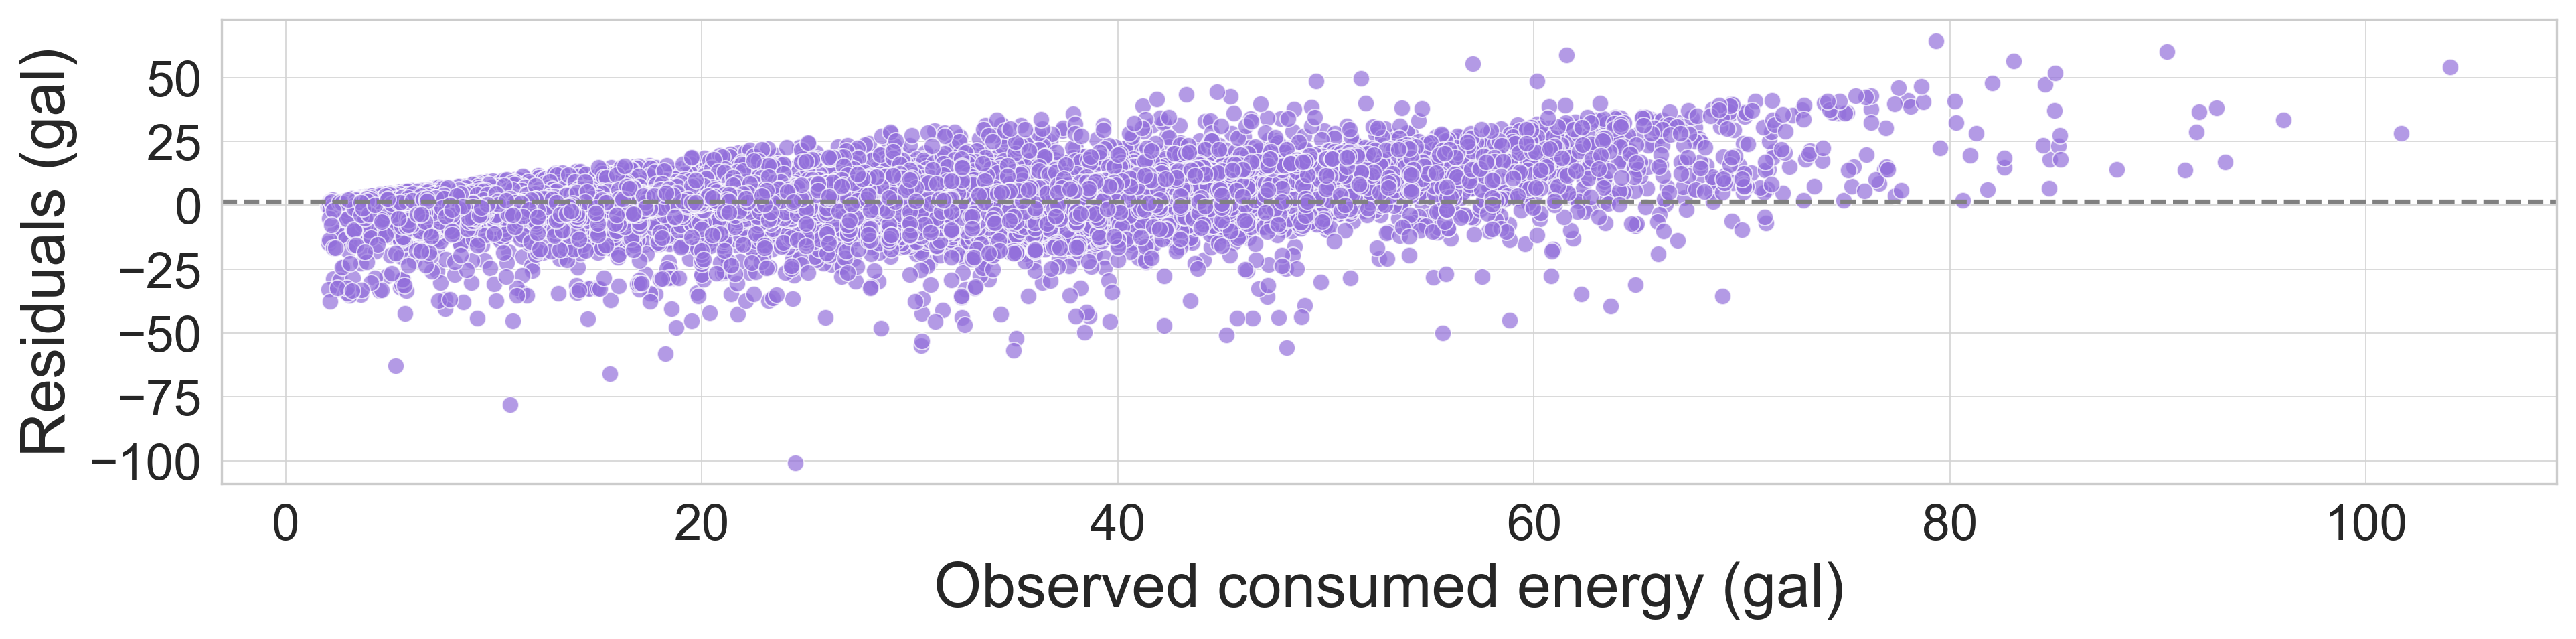

In [115]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='Qty', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed consumed energy (gal)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

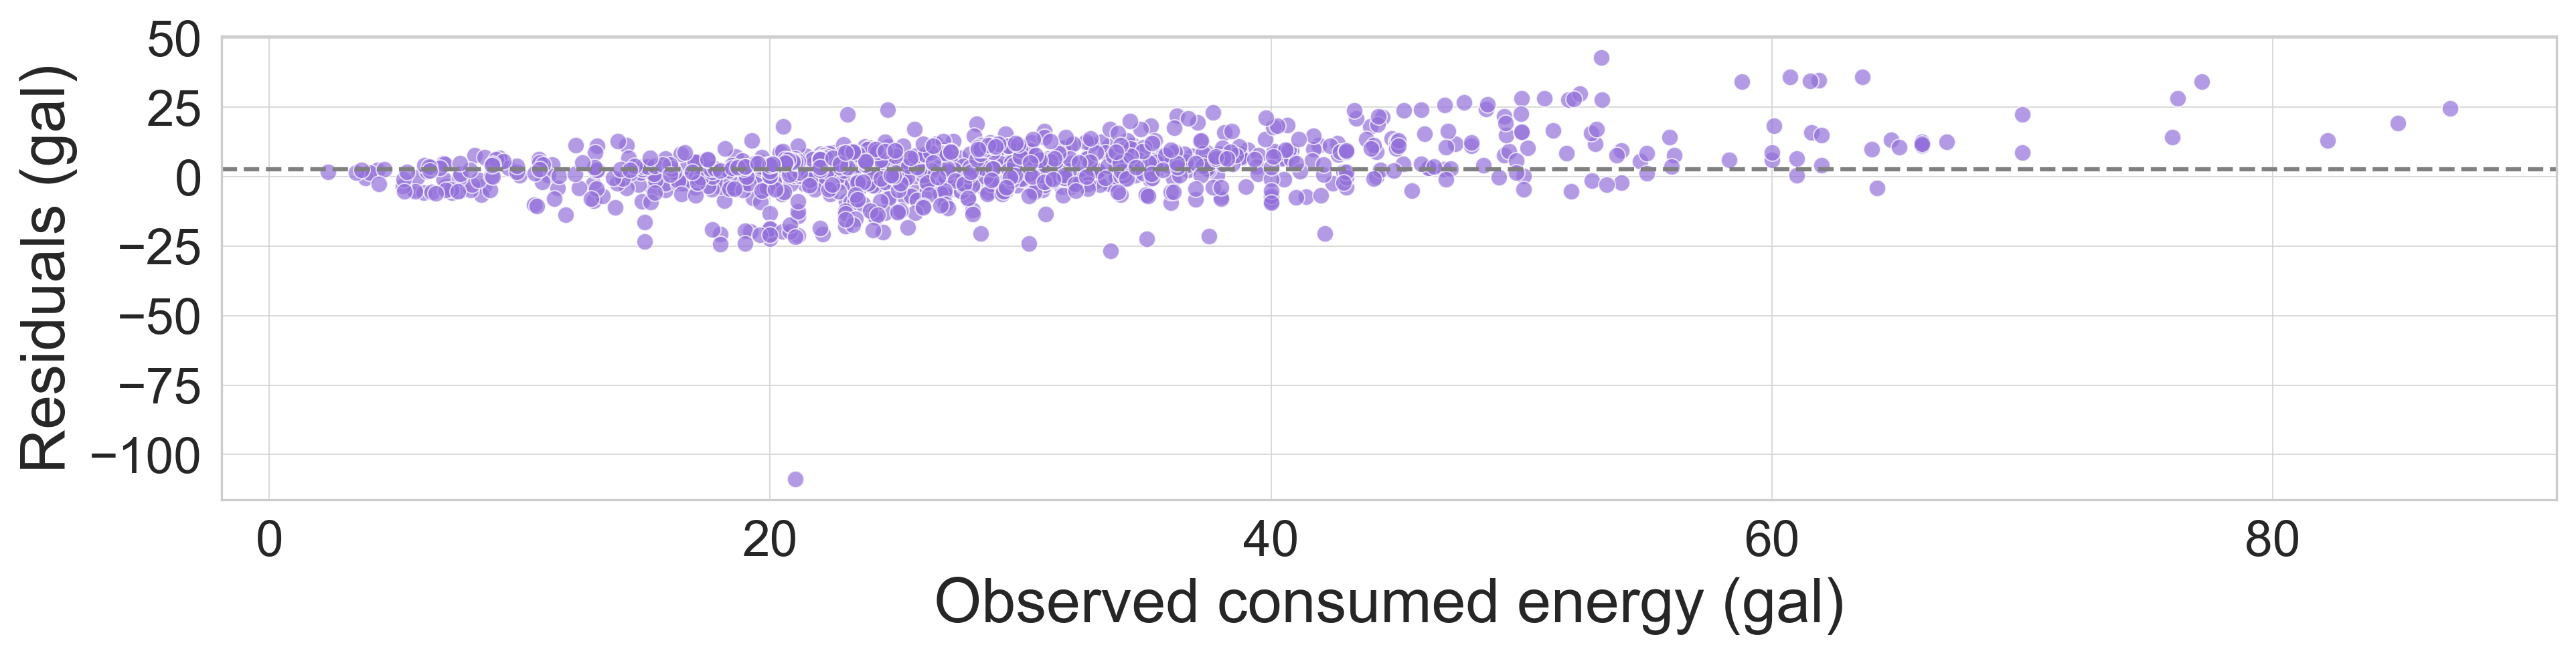

In [116]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='Qty', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed consumed energy (gal)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

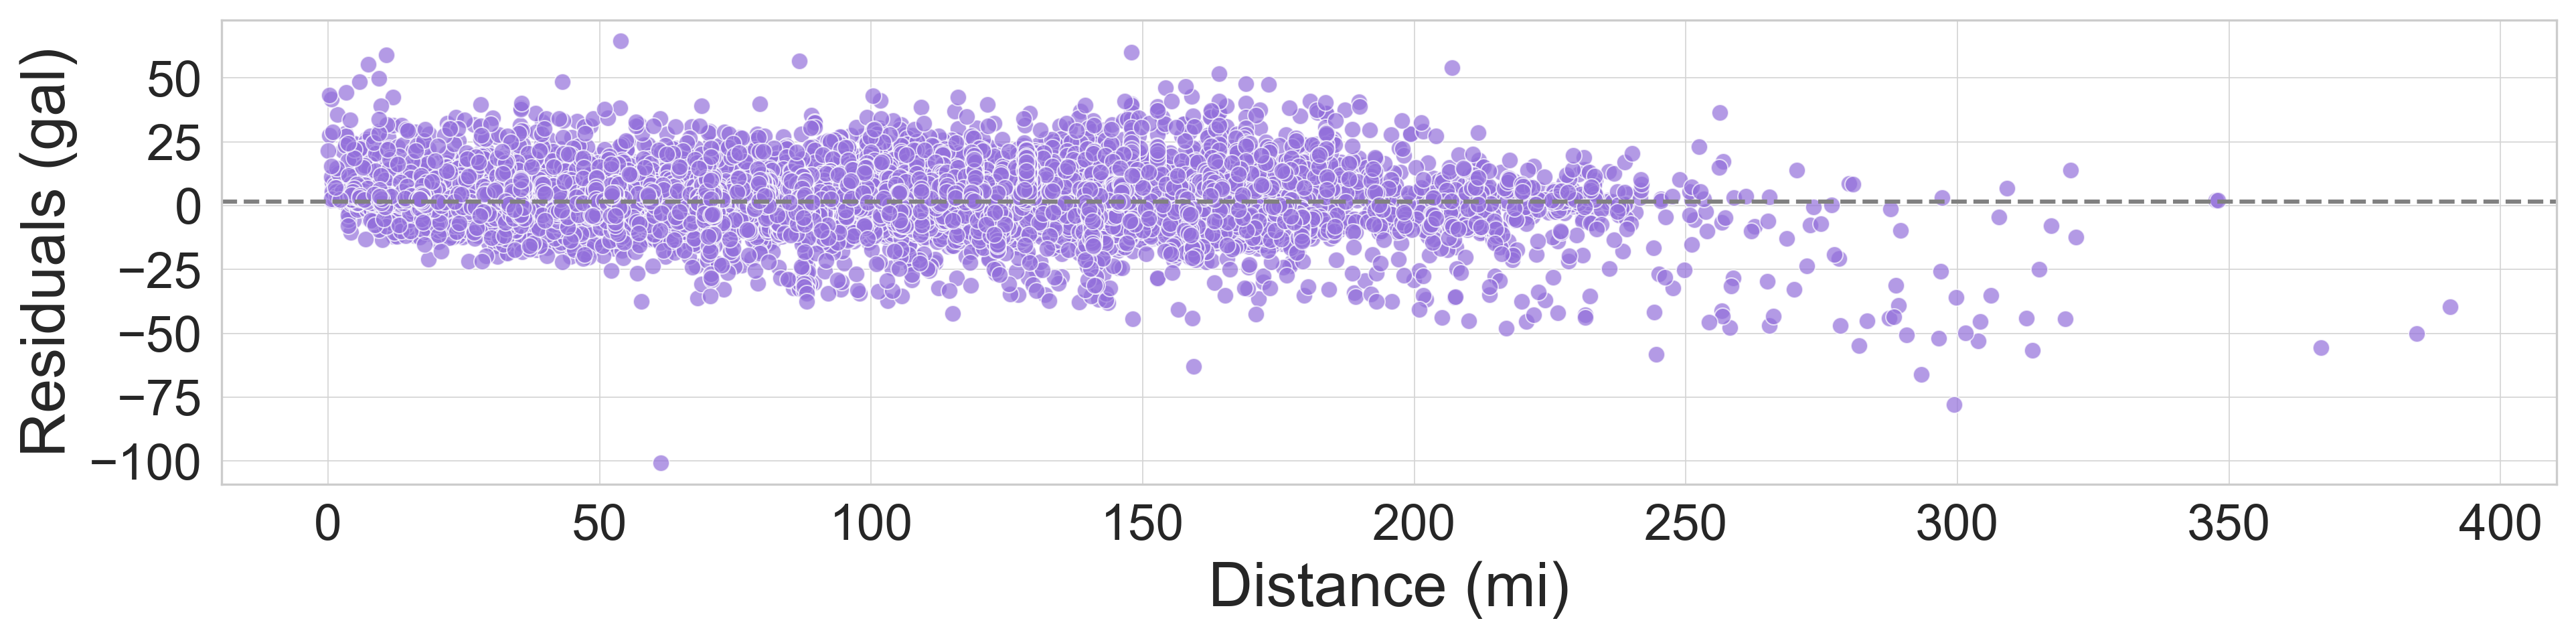

In [117]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Distance (mi)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
#fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')

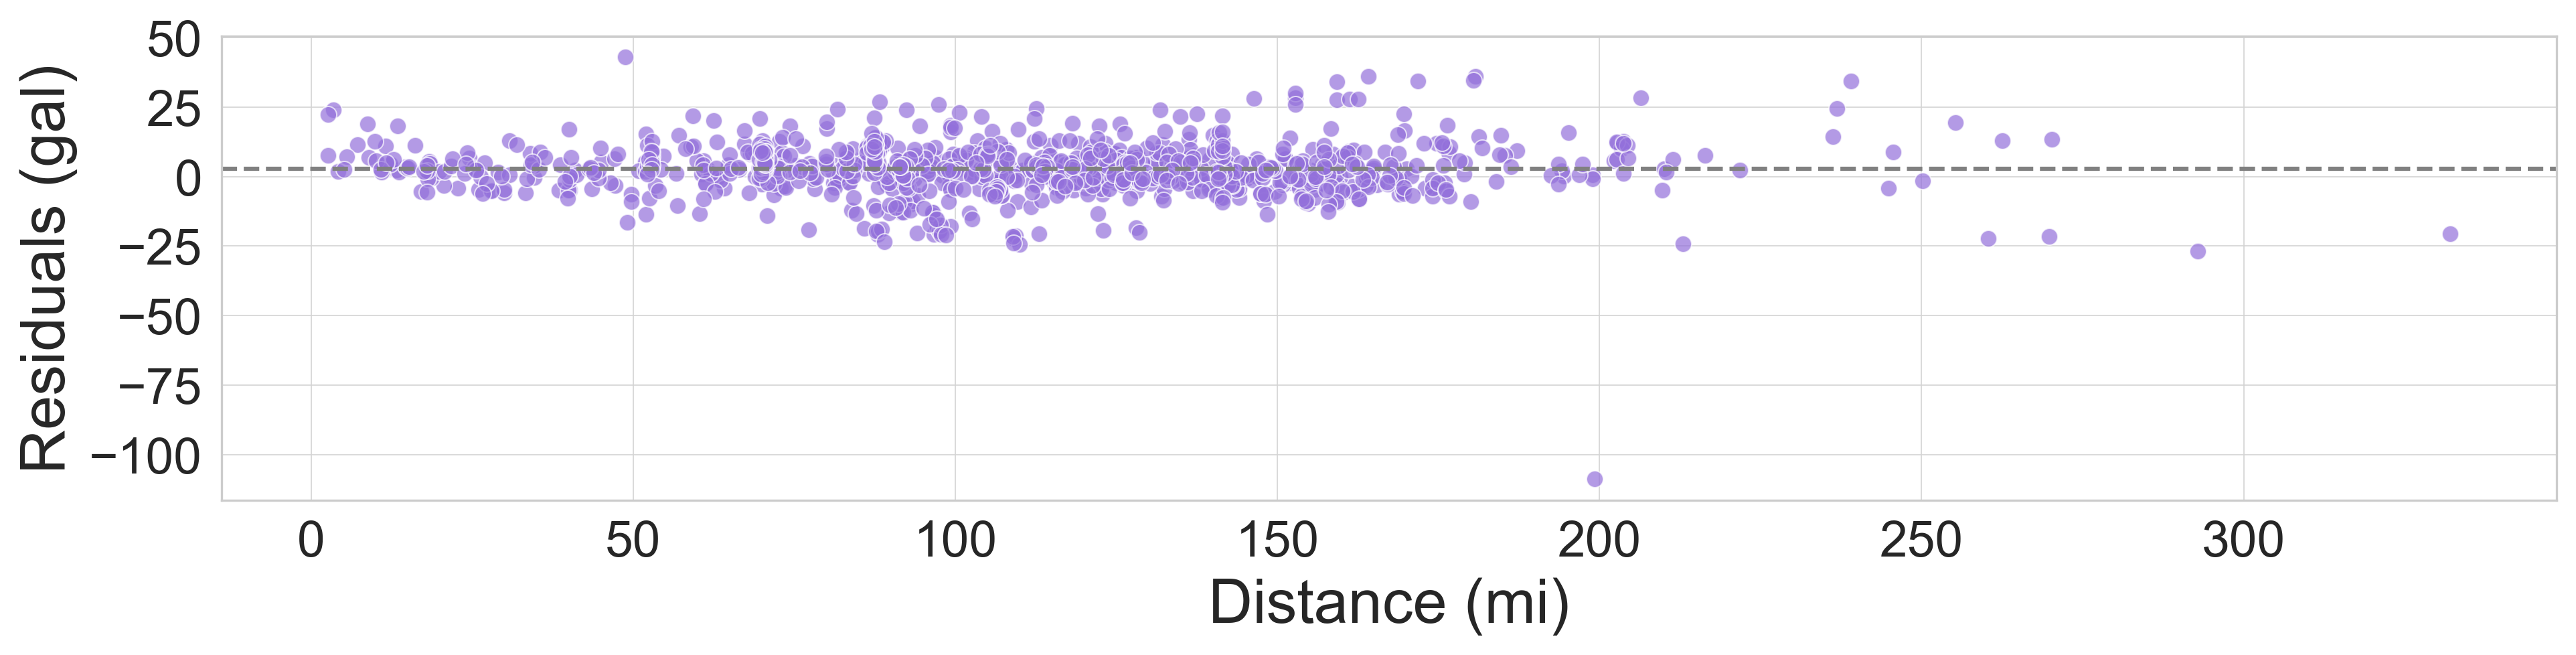

In [118]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Distance (mi)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
#fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')fig, ax = plt.subplots(figsize=(15,5), dpi=300)

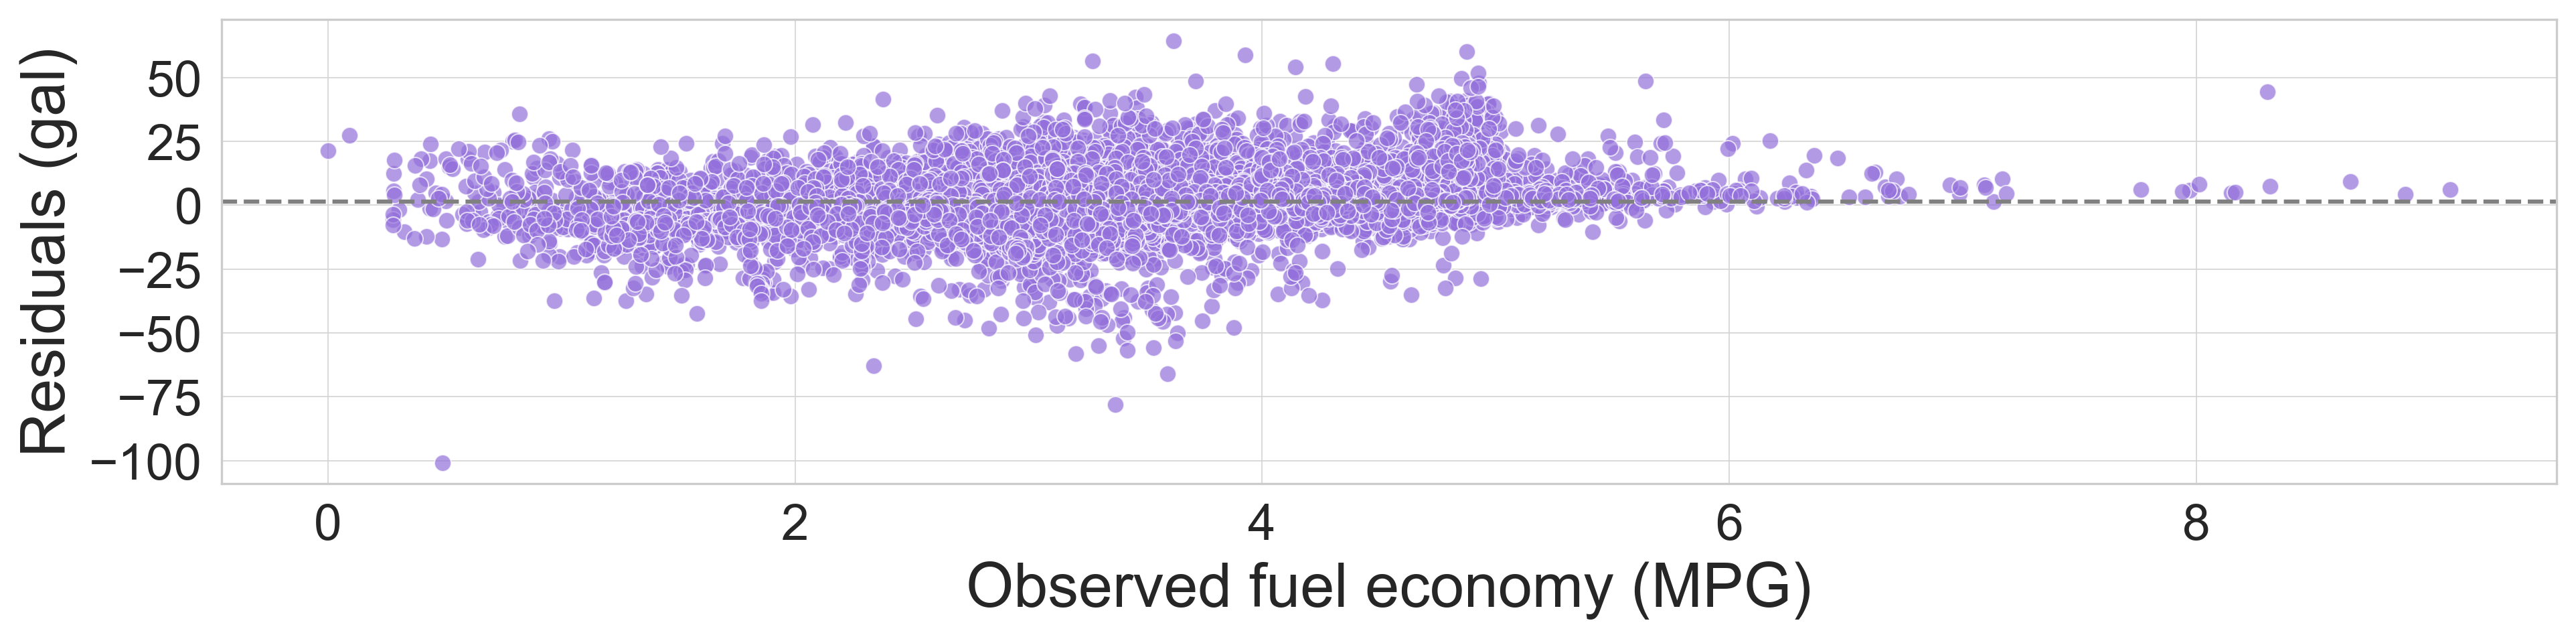

In [119]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_cdb, color='mediumpurple', alpha=0.7)
plt.axhline(df_cdb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed fuel economy (MPG)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

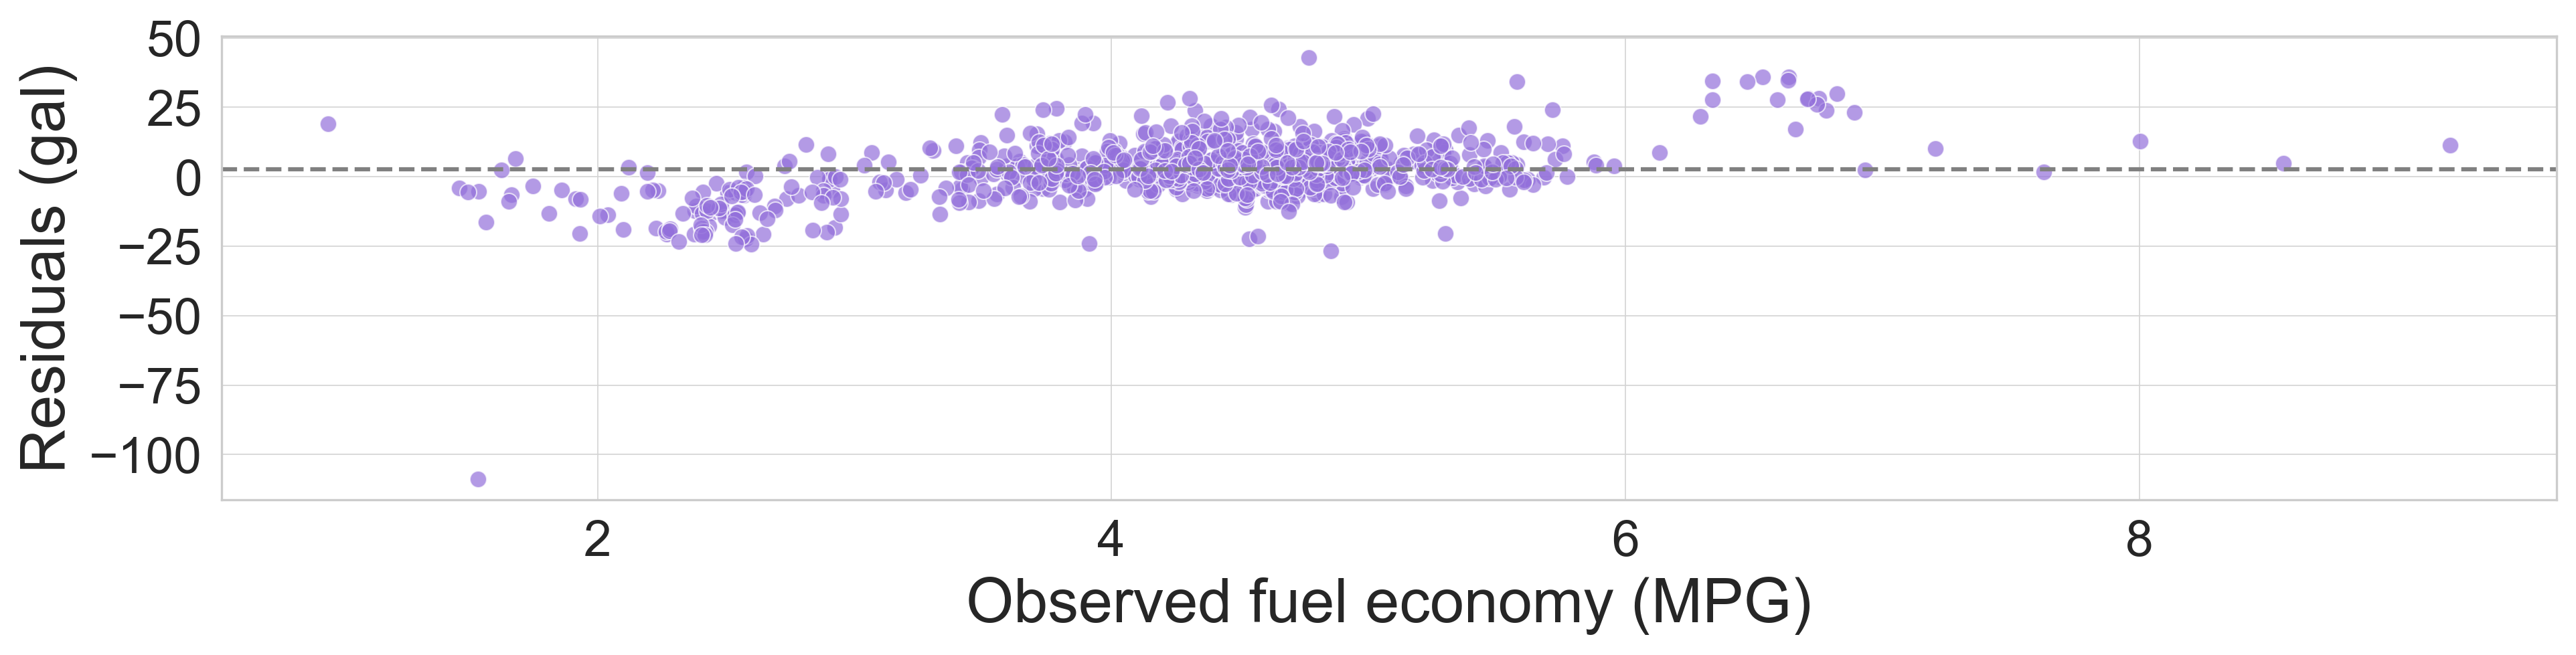

In [120]:
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_heb, color='mediumpurple', alpha=0.7)
plt.axhline(df_heb['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=22)
plt.xlabel('Observed fuel economy (MPG)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
#fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

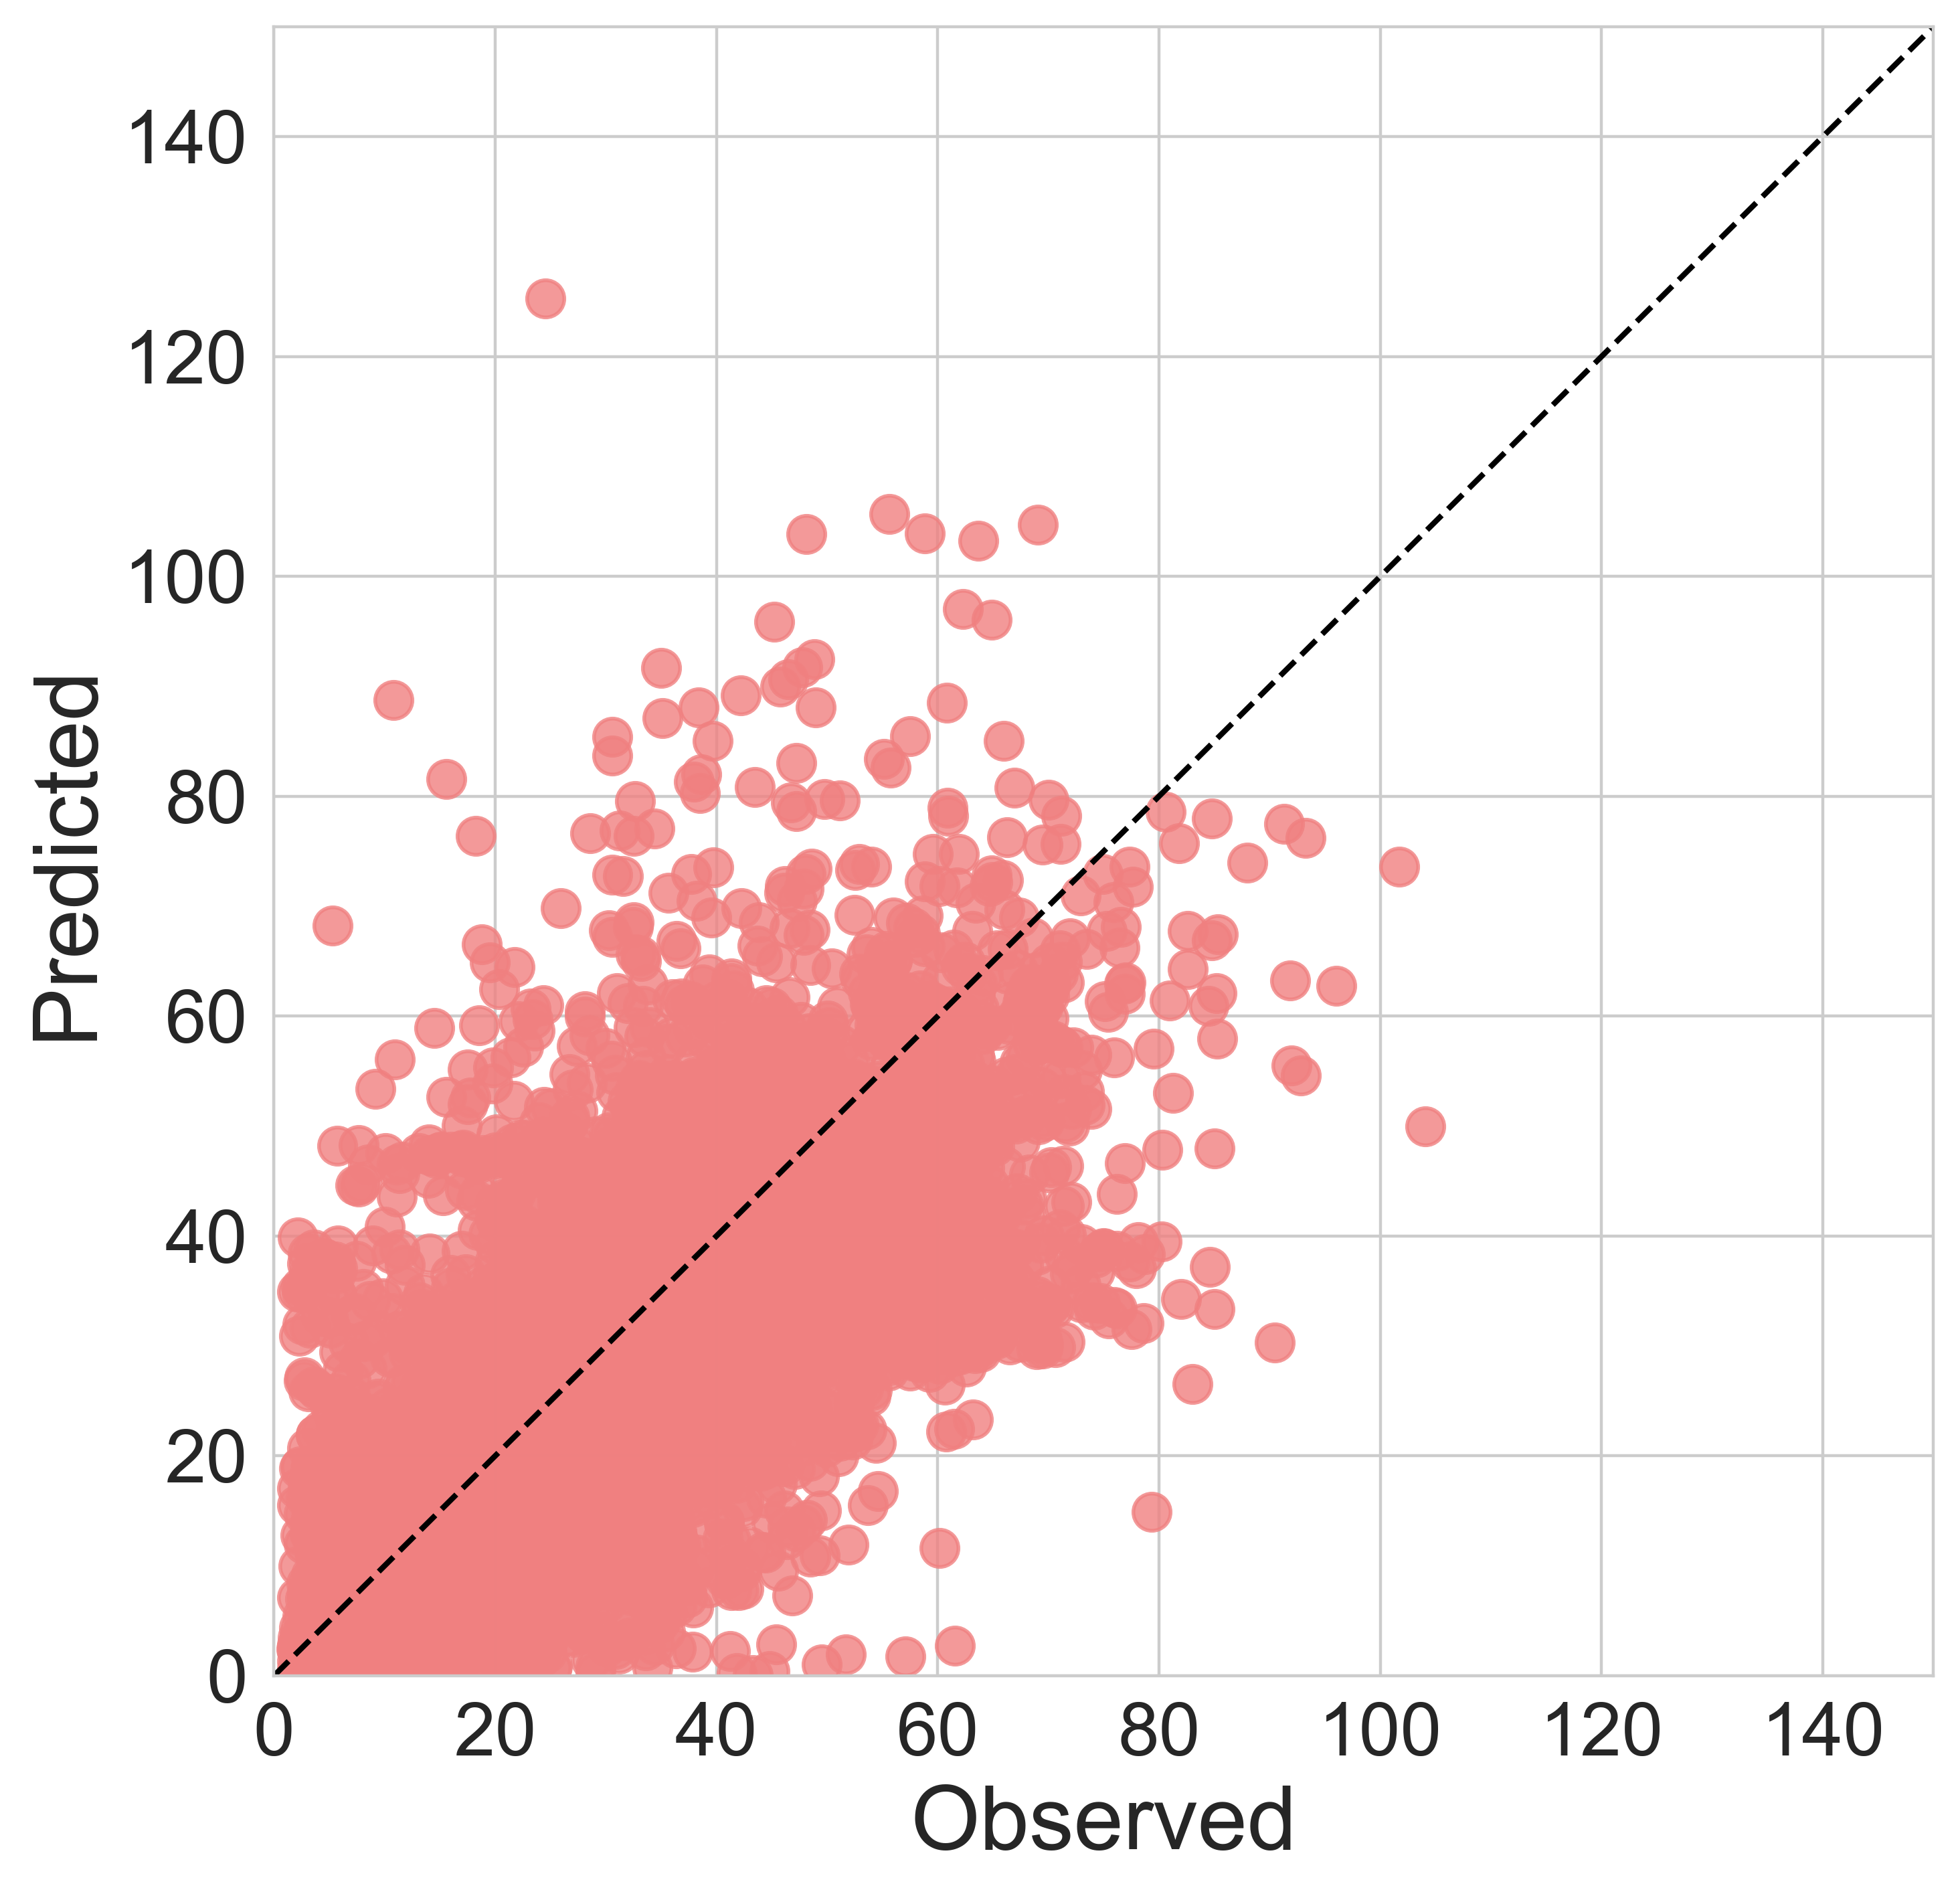

In [121]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 8), dpi=400)

# Filter the DataFrame
filtered_df = df_cdb[(df_cdb['Energy'] >= 0) & (df_cdb['Energy'] <= 150)]

# create a scatter plot of predicted vs observed
plt.scatter(df_cdb['Qty'], df_cdb['Energy'], alpha=0.8, s=100, color='lightcoral')

# Calculate the minimum and maximum limits for x and y axes
xlim = ylim = (0, 150)
xy_min = min(xlim[0], ylim[0])
xy_max = max(xlim[1], ylim[1])

# add a reference line showing perfect agreement between predicted and observed values
plt.plot([xy_min, xy_max], [xy_min, xy_max], color='black', linestyle='dashed')

# set the axis limits
plt.xlim(xlim)
plt.ylim(ylim)

# set the axis labels
plt.ylabel('Predicted', fontsize=24)
plt.xlabel('Observed', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/CDB-observed-vs-predicted-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

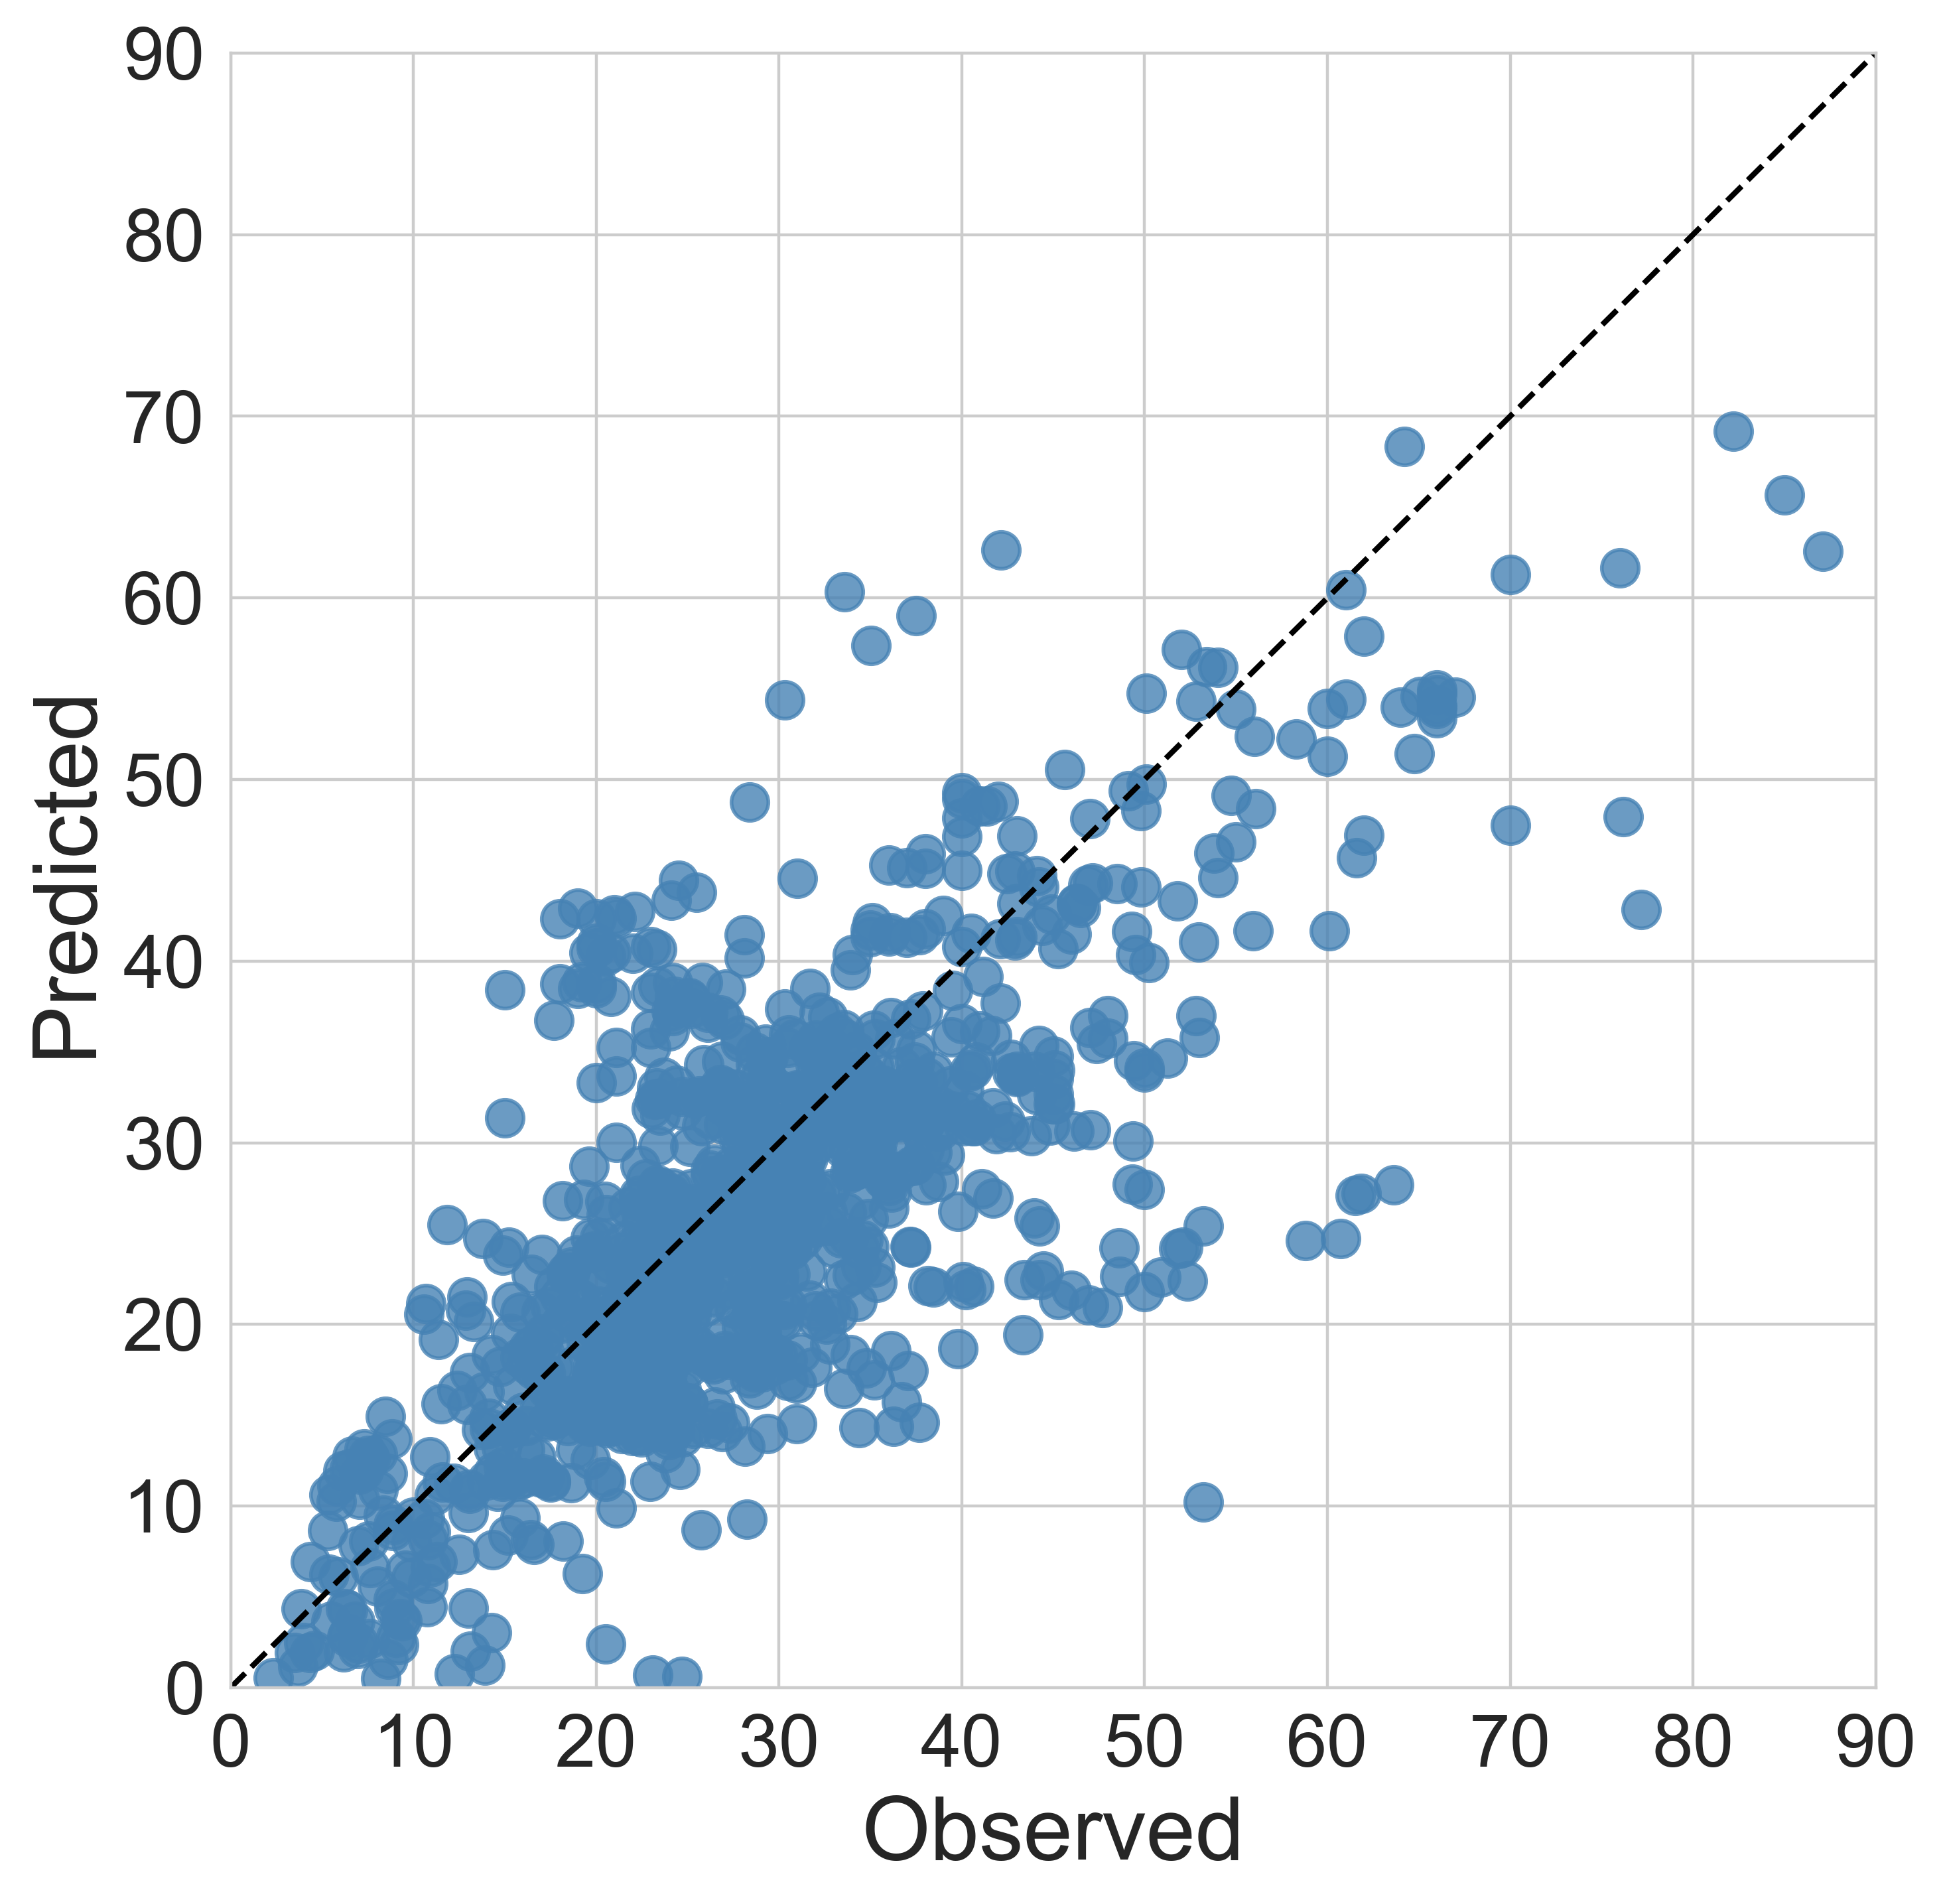

In [122]:
# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 8), dpi=400)

# create a scatter plot of predicted vs observed
plt.scatter(df_heb['Qty'], df_heb['Energy'], alpha=0.8, s=100, color='steelblue')

# set the axis limits to 90
xlim = ylim = (0, 90)
plt.xlim(xlim)
plt.ylim(ylim)

# add a reference line showing perfect agreement between predicted and observed values
plt.plot(xlim, ylim, color='black', linestyle='dashed')

# set the axis labels
plt.ylabel('Predicted', fontsize=24)
plt.xlabel('Observed', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/HEB-observed-vs-predicted-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

In [123]:
train_df_cdb_vehicle, test_df_cdb_vehicle = train_test_split(df_cdb, test_size=0.2, random_state=42)
train_df_heb_vehicle, test_df_heb_vehicle = train_test_split(df_heb, test_size=0.2, random_state=42)

In [124]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_vehicle['Qty'], test_df_cdb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.25
RMSE: 8.88


In [125]:
top_30_rows = test_df_cdb_vehicle.nlargest(30, 'mape')
top_30_rows

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
4107         4309   5958     1644   2.08  2022-01-12 21:37:00         362802   
21966       22953   2765     7553   2.70  2021-12-13 19:25:00          52496   
15665       16334  13928     1835   4.08  2021-11-16 19:23:00         234408   
17820       18671  16601     1849   5.74  2022-01-21 19:04:00         269011   
24974       26053   3182     7816  10.80  2021-12-20 06:05:00          13495   
23747       24793   1528     7811   2.40  2021-11-26 16:39:00         351548   
4190         4396   6045     1645   3.60  2021-11-17 18:01:00              0   
9518         9925  17708     1717   5.52  2021-12-10 21:49:00          62977   
10902       11364  26632     1722   5.58  2022-07-06 16:32:00          41433   
16366       17076  15354     1840   7.36  2022-01-18 23:14:00         218203   
23780       24829   1564     7811   9.20  2022-02-03 05:43:00         355434   
8127         8501  14595     1711   3.05  2021-10-15 15:12:00         257318   
15666       16336  13930     1835   2.88  2021-11-17 16:27:00         234473   
24794       25869   2358     7815   3.40  2022-02-28 05:34:00         338899   
8982         9379  17308     1715   2.71  2021-10-26 15:15:00          58624   
22786       23798   3541     7660   5.30  2022-09-01 16:00:00         525829   
502           524   5162     1555   3.34  2022-01-14 15:46:00         355044   
59             61   4466     1510   3.79  2021-12-31 18:48:00         757861   
8247         8624  14718     1711  11.37  2022-06-11 18:24:00         275315   
4426         4659   6280     1648   4.04  2021-11-16 15:49:00         382608   
24282       25346   1961     7813   6.50  2022-02-14 15:14:00         345624   
20988       21922  22245     1862   8.13  2022-06-12 20:17:00           9300   
25023       26108   3237     7816  13.10  2022-02-23 05:57:00          21209   
3757         3930   5640     1640   4.31  2022-01-31 15:49:00         240671   
16004       16704  24902     1836  19.52  2022-07-01 19:49:00              0   
8377         8757  14790     1712   3.88  2021-12-17 16:13:00         273849   
4231         4446   6095     1645  10.64  2022-02-07 19:30:00         363305   
11340       11817  27159     1724  20.39  2022-07-01 23:20:00          12468   
16465       17179  15404     1841   4.62  2021-10-25 15:21:00         247263   
4370         4599   6220     1647   5.85  2021-12-17 15:39:00         592503   

      Fuel Orfluid Type    Powertrain        dist     Energy         mape  \
4107                DIE  conventional   94.397665  34.926932  1579.179415   
21966               DIE  conventional   82.971721  26.853731   894.582634   
15665               DIE  conventional  134.527453  34.516524   745.993244   
17820               DIE  conventional  170.862682  48.229443   740.234195   
24974               DIE  conventional  299.368932  88.772878   721.971095   
23747               DIE  conventional   70.403779  19.043707   693.487779   
4190                DIE  conventional  107.237904  26.283773   630.104817   
9518                DIE  conventional  112.400191  37.702689   583.019721   
10902               DIE  conventional  129.781243  36.576995   555.501711   
16366               DIE  conventional  132.798840  44.631556   506.407012   
23780               DIE  conventional  159.101950  53.397052   480.402735   
8127                DIE  conventional   31.444439  17.362719   469.269462   
15666               DIE  conventional   53.401336  16.208262   462.786866   
24794               DIE  conventional   70.059729  19.105488   461.926112   
8982                DIE  conventional   12.712338  14.726288   443.405450   
22786               DIE  conventional   89.858770  24.066459   354.084128   
502                 DIE  conventional   19.158555  14.337277   329.259790   
59                  DIE  conventional   12.047577  15.903781   319.624826   
8247                DIE  conventional  143.224022  45.689208   

In [126]:
# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_vehicle['Qty'], test_df_heb_vehicle['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.24
RMSE: 8.53


In [127]:
top_30_rows = test_df_heb_vehicle.nlargest(30, 'mape')
top_30_rows

Unnamed: 0  index  Vehicle    Qty      ServiceDateTime  Meter1Reading  \
810          848   2515     7901  18.00  2022-02-11 07:01:00         190838   
983         1024   2665     7902  17.70  2022-02-18 07:11:00         201855   
1048        1091   4156     7902  20.00  2022-09-23 05:23:00         210656   
847          886   2553     7901  19.20  2022-04-08 05:33:00         195631   
244          256  11988     1803  10.68  2021-10-19 21:53:00              0   
707          739  12372     1805   5.39  2022-06-25 22:13:00         300829   
552          575  12271     1804  20.53  2022-06-21 15:59:00         366709   
333          349  12081     1803   6.50  2022-04-14 15:27:00         365794   
30            32  11808     1801   5.79  2021-12-24 18:29:00         346217   
825          864   2531     7901  28.40  2022-03-05 12:19:00         192817   
464          484  12180     1804   9.05  2022-01-13 20:39:00         352300   
243          255  11987     1803   6.94  2021-10-19 15:54:00         353057   
342          358  12090     1803   6.20  2022-05-04 17:34:00              0   
290          305  12037     1803  28.25  2021-12-17 19:47:00         359955   
800          838   2505     7901  20.00  2022-01-28 05:44:00         189585   
445          464  12160     1804  37.69  2021-12-04 19:31:00         349681   
679          710  12343     1805   4.60  2022-04-28 15:25:00         296680   
712          746  24292     1805  18.21  2022-08-01 22:00:00         301489   
67            70  11846     1801  50.91  2022-04-01 19:33:00         351290   
636          666  12299     1805  52.10  2021-11-13 21:58:00         290777   
528          551  12247     1804  48.66  2022-05-04 19:34:00         362991   
775          813   2480     7901  21.10  2021-11-22 14:59:00         186358   
465          485  12181     1804  16.43  2022-01-14 18:23:00         352411   
106          113  11889     1801  18.16  2022-06-09 22:14:00         357798   
589          615  24259     1804  14.36  2022-08-24 18:33:00         372975   
58            61  11837     1801  27.32  2022-03-21 17:48:00              0   
618          647  12280     1805  19.62  2021-10-13 22:18:00         287697   
355          371  12103     1803  40.66  2022-05-18 20:39:00         368816   
458          477  12173     1804   3.48  2021-12-23 15:43:00         351460   
917          958   2599     7902  31.00  2021-10-22 05:24:00         194050   

     Fuel Orfluid Type Powertrain        dist     Energy        mape  \
810                DIE     hybrid   87.917469  38.736568  115.203157   
983                DIE     hybrid   77.217698  36.755985  107.660932   
1048               DIE     hybrid   98.574611  40.988655  104.943274   
847                DIE     hybrid   88.068842  38.856026  102.375138   
244                DIE     hybrid   56.829358  21.140230   97.942232   
707                DIE     hybrid   53.920087  10.624061   97.106886   
552                DIE     hybrid   13.408943   2.407978   88.270932   
333                DIE     hybrid   18.004470  12.044475   85.299622   
30                 DIE     hybrid   43.619864  10.261157   77.222048   
825                DIE     hybrid   94.118331  48.775799   71.745770   
464                DIE     hybrid   12.803184   2.786444   69.210569   
243                DIE     hybrid   18.378543   2.146697   69.067766   
342                DIE     hybrid   11.565284   1.964765   68.310240   
290                DIE     hybrid    8.801329   9.256849   67.232392   
800                DIE     hybrid   60.288024  33.310788   66.553939   
445                DIE     hybrid  100.642500  14.601390   61.259246   
679                DIE     hybrid   10.787378   2.032862   55.807354   
712                DIE     hybrid   58.168329   8.071374   55.676148   
67                 DIE     hybrid  152.776362  22.621591   55.565525   
636                DIE     hybrid  162.561812  24.233789   53.486011   
528                DIE     hybrid  152.77636

## Weekly system level performance

In [128]:
df_heb['ServiceDateTime'] = pd.to_datetime(df_heb['ServiceDateTime'])
df_heb = df_heb.set_index('ServiceDateTime')
weekly_energy_heb = df_heb[['Energy','Qty']].resample('W').sum()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_40348\3935629555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heb['ServiceDateTime'] = pd.to_datetime(df_heb['ServiceDateTime'])


In [129]:
weekly_energy_heb=weekly_energy_heb.reset_index()
weekly_energy_heb

ServiceDateTime       Energy      Qty
0       2021-10-03    60.318705    71.03
1       2021-10-10   470.889284   478.15
2       2021-10-17   711.406042   739.43
3       2021-10-24   801.346964   841.32
4       2021-10-31   854.736330   924.62
5       2021-11-07   572.350574   596.40
6       2021-11-14   742.682012   748.49
7       2021-11-21   565.785150   579.73
8       2021-11-28   574.238391   648.20
9       2021-12-05   575.365884   594.13
10      2021-12-12   720.140563   755.72
11      2021-12-19   618.428496   745.80
12      2021-12-26   361.040972   399.42
13      2022-01-02   309.698516   305.22
14      2022-01-09   197.194642   203.26
15      2022-01-16    86.314309   111.59
16      2022-01-23   164.277298   184.46
17      2022-01-30   431.259338   509.37
18      2022-02-06   358.978011   393.79
19      2022-02-13   519.290443   518.82
20      2022-02-20   582.576074   577.47
21      2022-02-27   445.898243   501.63
22      2022-03-06   537.182852   495.39
23      2022-03-13   352.452260   365.20
24      2022-03-20   214.017172   203.72
25      2022-03-27   598.575833   692.32
26      2022-04-03   749.773672   817.62
27      2022-04-10   866.570087   874.35
28      2022-04-17   921.979732  1007.60
29      2022-04-24   861.135418   848.23
30      2022-05-01   762.585953   805.41
31      2022-05-08  1091.417705  1107.85
32      2022-05-15   853.792466   976.38
33      2022-05-22   526.566822   658.71
34      2022-05-29   699.781019   837.74
35      2022-06-05   467.357952   627.95
36      2022-06-12   285.672921   333.47
37      2022-06-19   274.024028   330.68
38      2022-06-26   421.552403   558.09
39      2022-07-03   578.618829   564.35
40      2022-07-10   294.941842   361.91
41      2022-07-17   297.083305   347.03
42      2022-07-24   441.862682   546.27
43      2022-07-31   327.926128   381.46
44      2022-08-07   380.667763   476.25
45      2022-08-14   338.654504   417.27
46      2022-08-21   185.091039   206.36
47      2022-08-28   214.237628   259.63
48      2022-09-04   395.334461   524.14
49      2022-09-11   579.652347   755.83
50      2022-09-18   705.423905   878.80
51      2022-09-25   910.941338  1011.51
52      2022-10-02   397.834871   459.56

In [130]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_df_heb_system, test_df_heb_system = train_test_split(weekly_energy_heb, test_size=0.2, random_state=42)

In [131]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_heb_system['Qty'], test_df_heb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_heb_system['Qty'], test_df_heb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.10
RMSE: 75.24


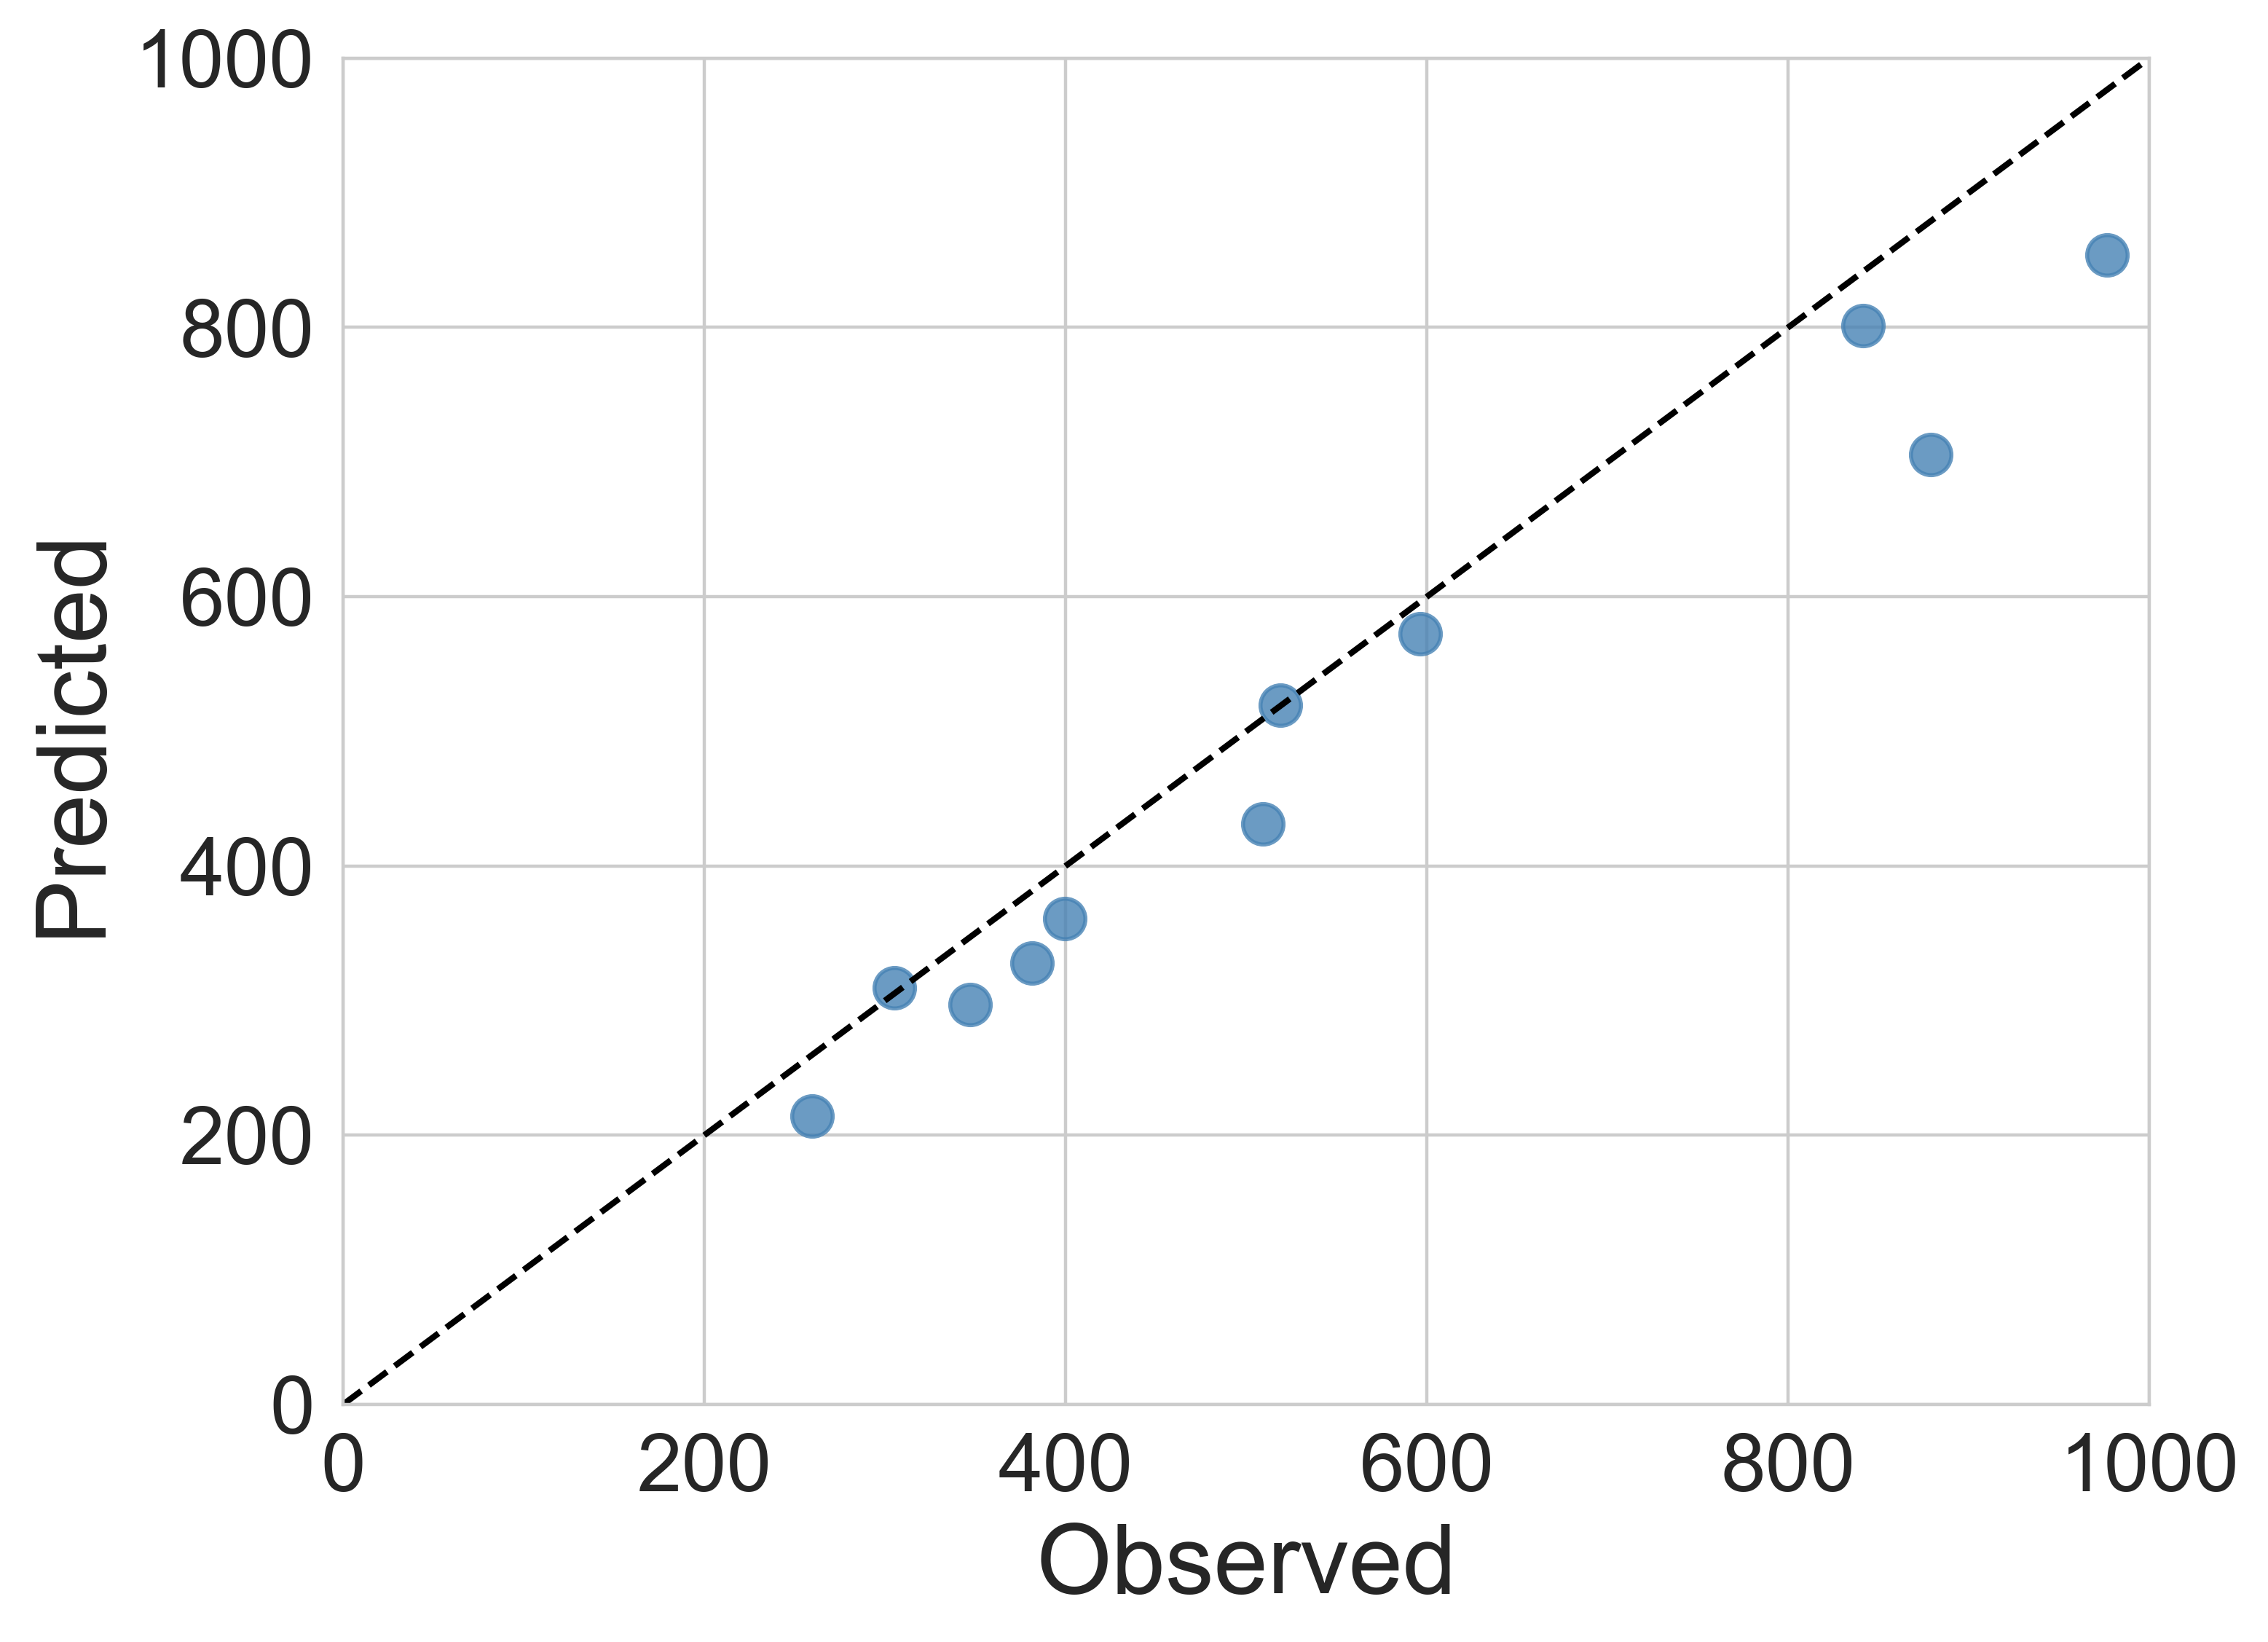

In [132]:

# create a new figure with specified size and DPI
fig = plt.figure(figsize=(8, 6), dpi=400)

# create a scatter plot of predicted vs observed
plt.scatter(test_df_heb_system['Qty'], test_df_heb_system['Energy'], alpha=0.8, s=100, color='steelblue')

# set the axis limits to 90
xlim = ylim = (0, 1000)
plt.xlim(xlim)
plt.ylim(ylim)

# add a reference line showing perfect agreement between predicted and observed values
plt.plot(xlim, ylim, color='black', linestyle='dashed')

# set the axis labels
plt.ylabel('Predicted', fontsize=24)
plt.xlabel('Observed', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# show the plot
plt.show()

# Saving
fig.savefig(r'../../figures/HEB-observed-vs-predicted-system-sep2021-oct2022.png', dpi=400, bbox_inches='tight')

In [133]:
df_cdb['ServiceDateTime'] = pd.to_datetime(df_cdb['ServiceDateTime'])
df_cdb = df_cdb.set_index('ServiceDateTime')
weekly_energy_cdb = df_cdb[['Energy','Qty']].resample('W').sum()

In [134]:
weekly_energy_cdb=weekly_energy_cdb.reset_index()
weekly_energy_cdb

ServiceDateTime        Energy       Qty
0       2021-10-03   2279.869655   2449.28
1       2021-10-10  16434.349750  17598.45
2       2021-10-17  13965.886890  15327.92
3       2021-10-24  16349.191486  17624.73
4       2021-10-31  15918.814833  16390.24
5       2021-11-07  16039.395896  16694.63
6       2021-11-14  13954.383988  14195.34
7       2021-11-21  15827.638499  16321.46
8       2021-11-28  12797.182976  13448.06
9       2021-12-05  15998.188256  16640.37
10      2021-12-12  15674.718301  16509.55
11      2021-12-19  14866.840541  15275.75
12      2021-12-26  12484.992988  12990.50
13      2022-01-02  12341.506432  12631.92
14      2022-01-09  14099.897938  14410.10
15      2022-01-16  14264.241346  14280.60
16      2022-01-23  13561.988710  12273.84
17      2022-01-30  15097.960378  15655.76
18      2022-02-06  14918.101905  15307.28
19      2022-02-13  15470.583642  15682.23
20      2022-02-20  14940.301555  15788.03
21      2022-02-27  14223.032061  14872.33
22      2022-03-06  15453.722012  16176.03
23      2022-03-13  15749.685451  16297.97
24      2022-03-20  15290.162626  16114.49
25      2022-03-27  15310.344022  15737.41
26      2022-04-03  15345.593358  15689.22
27      2022-04-10  15312.934197  15403.65
28      2022-04-17  14681.658571  15337.61
29      2022-04-24  13369.123468  13996.97
30      2022-05-01  15453.692735  15687.34
31      2022-05-08  15065.778890  14812.05
32      2022-05-15  15219.293968  16044.78
33      2022-05-22  14182.619701  15770.32
34      2022-05-29  14717.076224  15658.26
35      2022-06-05  13298.903851  14107.89
36      2022-06-12  15405.041031  16389.65
37      2022-06-19  15302.607115  16296.85
38      2022-06-26  14252.736846  14971.09
39      2022-07-03  13848.771572  12837.80
40      2022-07-10  12901.564854  14227.01
41      2022-07-17  14514.124624  16202.55
42      2022-07-24  13737.304973  15557.43
43      2022-07-31  14100.395104  15494.97
44      2022-08-07  14504.008262  15901.59
45      2022-08-14  14249.536204  15740.95
46      2022-08-21  14422.043064  15344.17
47      2022-08-28  14330.716147  15427.69
48      2022-09-04  15131.998010  16549.58
49      2022-09-11  13347.279738  14245.54
50      2022-09-18  15599.767169  16592.70
51      2022-09-25  15062.117172  15842.24
52      2022-10-02  10398.756374  10683.43

In [135]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
train_df_cdb_system, test_df_cdb_system = train_test_split(weekly_energy_cdb, test_size=0.2, random_state=42)

In [136]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute MAPE
mape = mean_absolute_percentage_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy'])

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_df_cdb_system['Qty'], test_df_cdb_system['Energy']))

print(f"MAPE: {mape:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 0.05
RMSE: 973.21


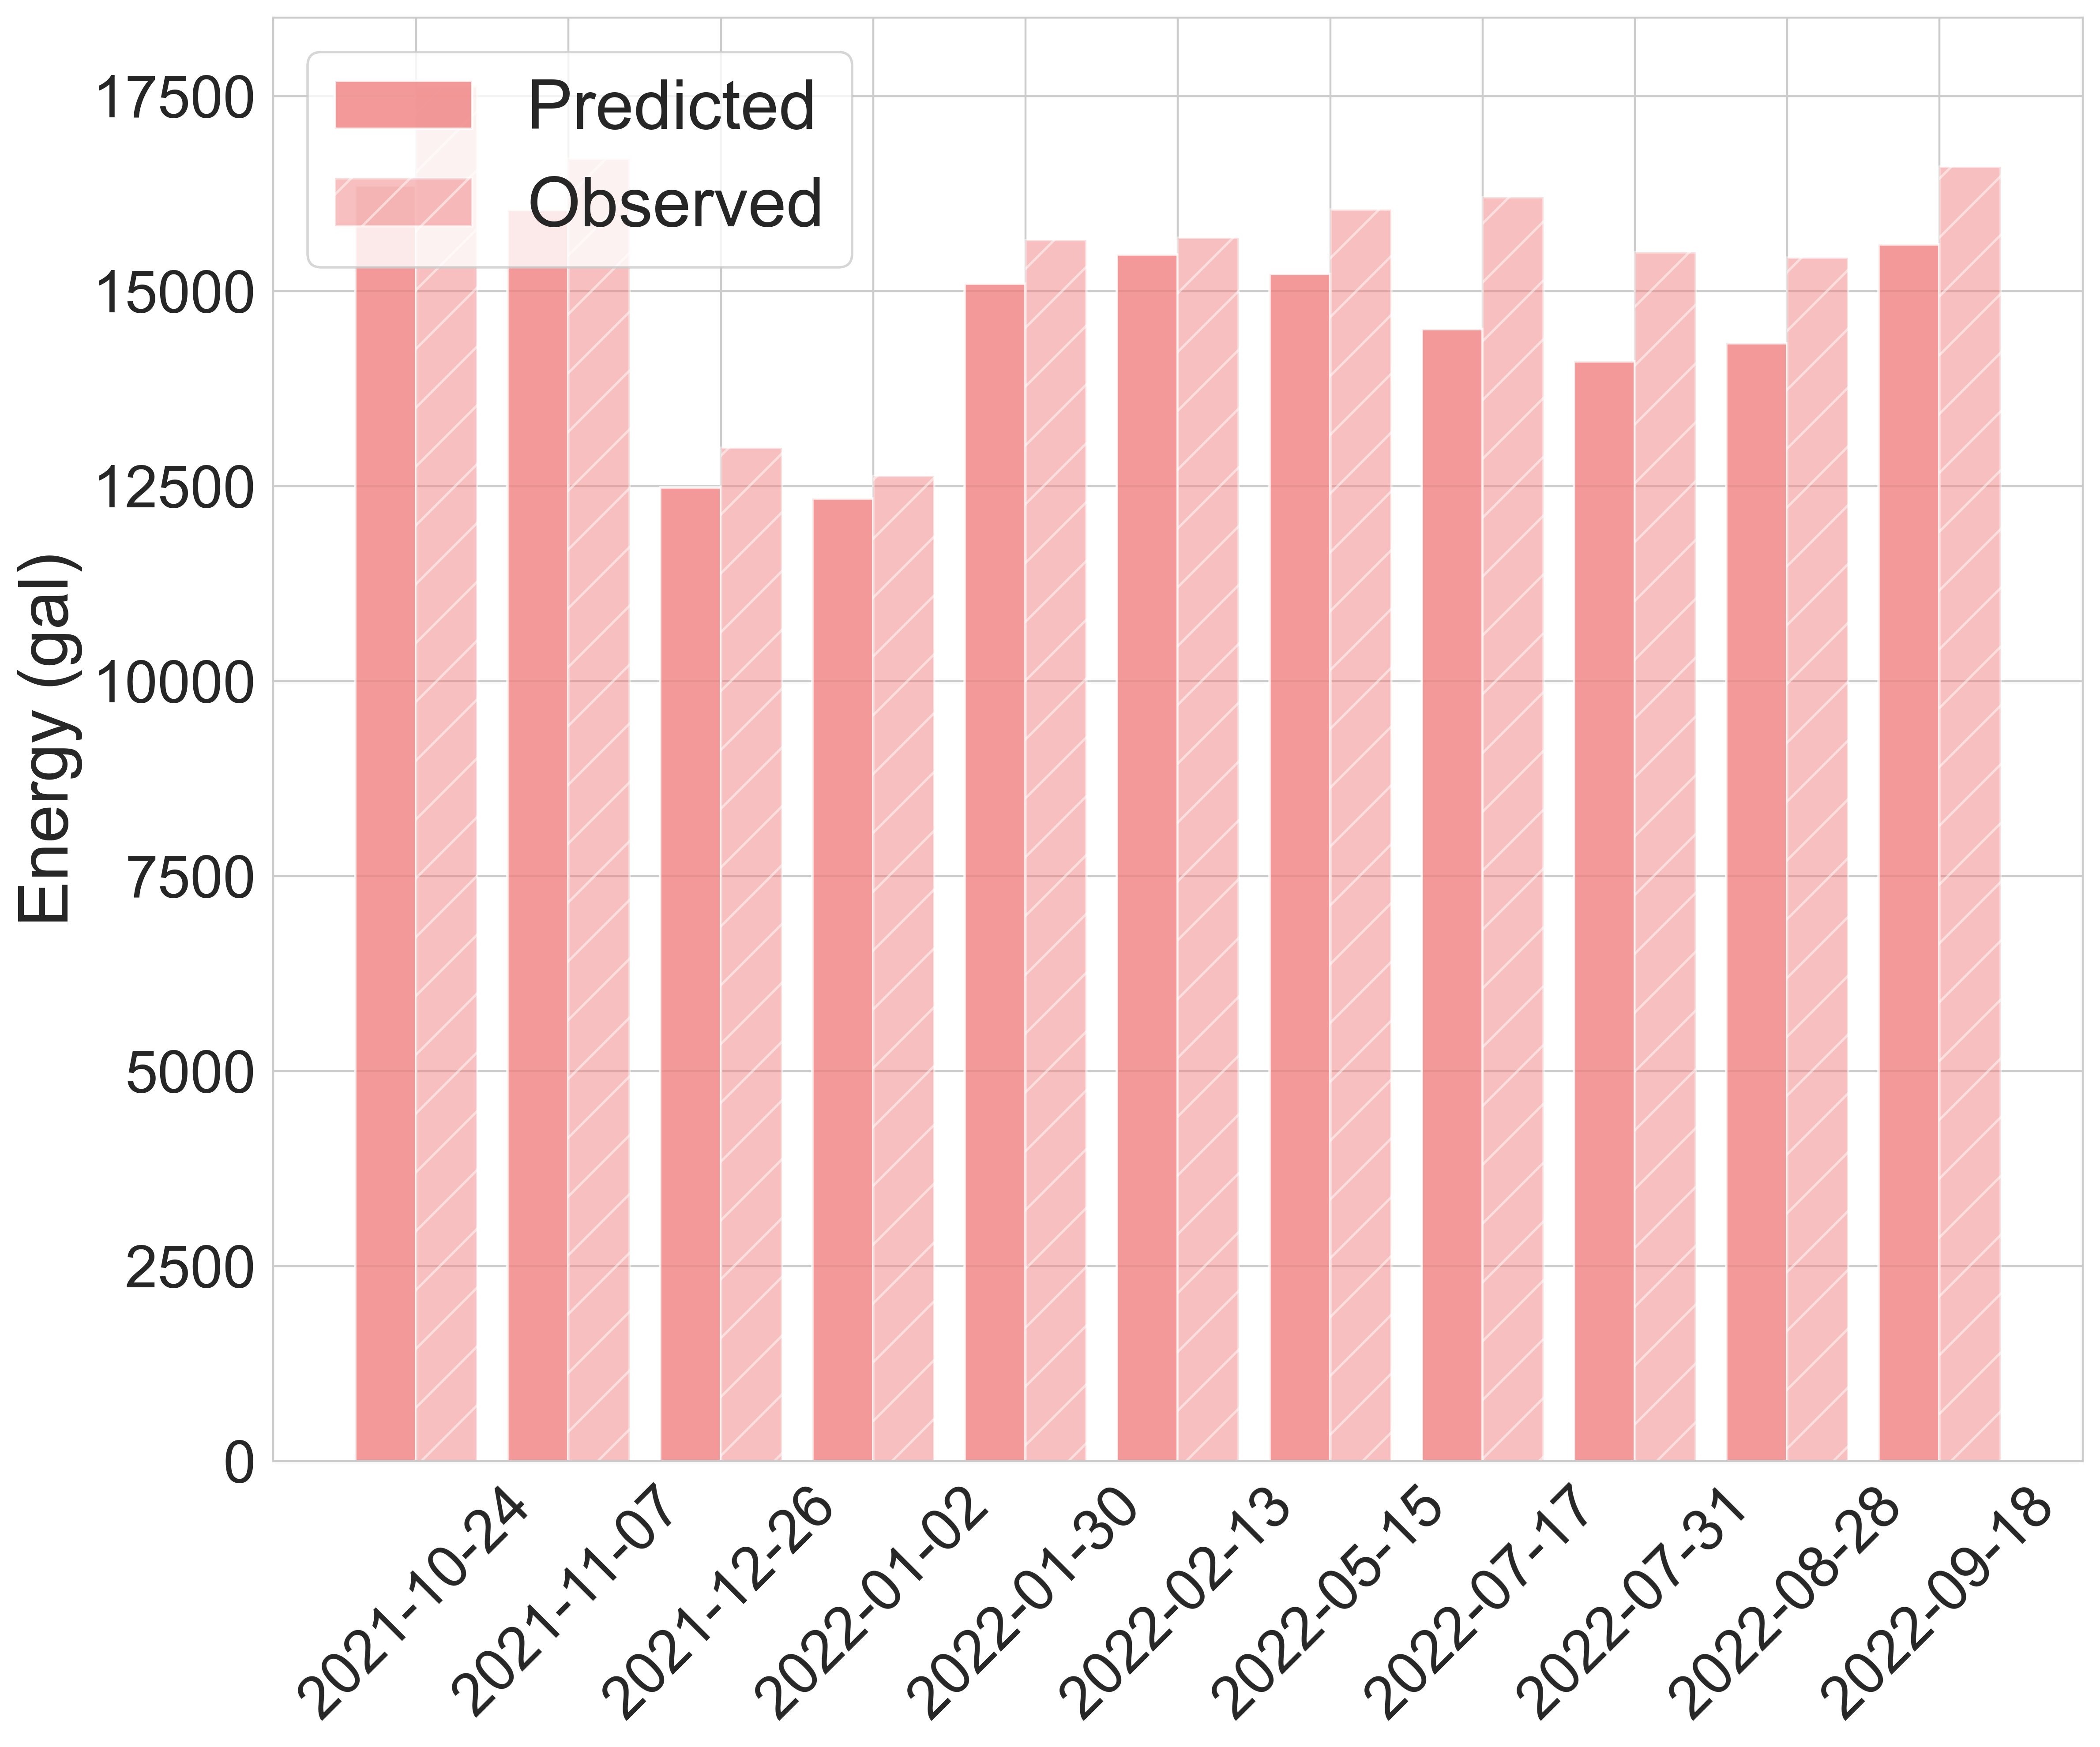

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'ServiceDateTime' is a datetime object
test_df_cdb_system['ServiceDateTime'] = pd.to_datetime(test_df_cdb_system['ServiceDateTime'])
test_df_cdb_system = test_df_cdb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_cdb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_cdb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_cdb_system['Energy'], width=bar_width, color='lightcoral', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_cdb_system['Qty'], width=bar_width, color='lightcoral', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_cdb_system.index.strftime('%Y-%m-%d'), rotation=45, fontsize=24)
plt.yticks(fontsize=24)


plt.ylabel('Energy (gal)', fontsize=28)
plt.legend(fontsize=28)
plt.tight_layout() 

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-CDB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


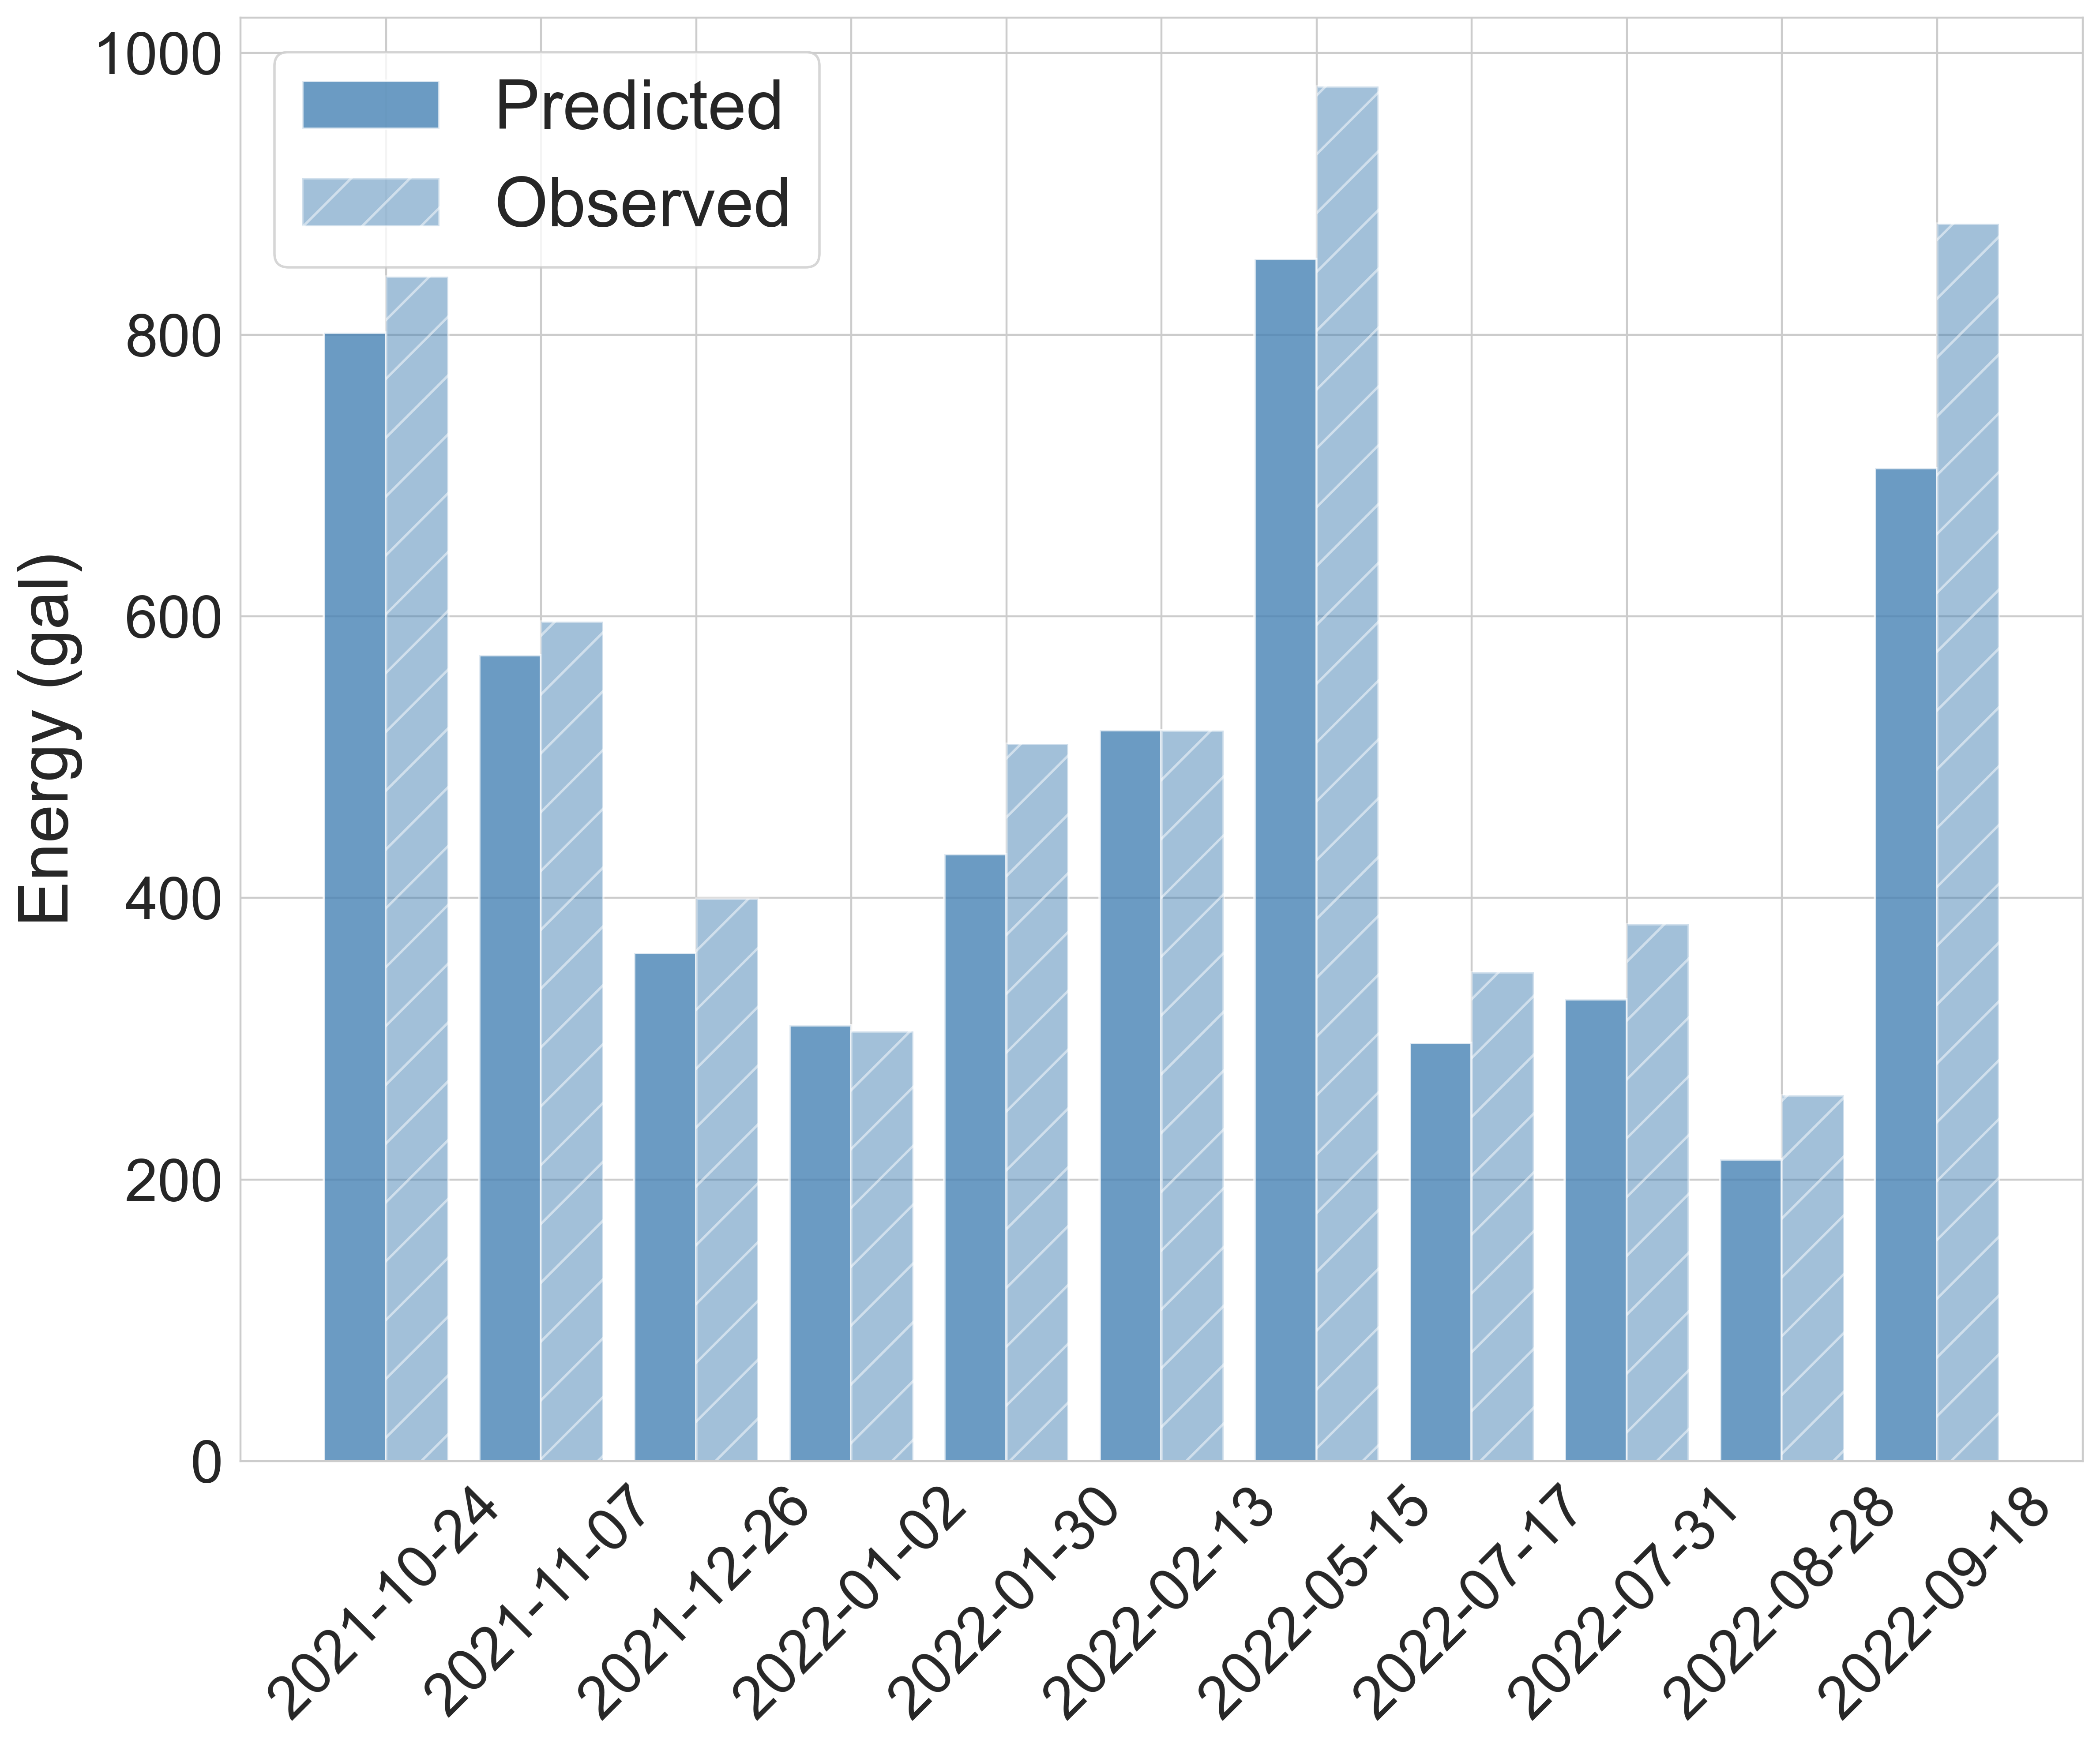

In [138]:
# Ensure 'ServiceDateTime' is a datetime object
test_df_heb_system['ServiceDateTime'] = pd.to_datetime(test_df_heb_system['ServiceDateTime'])
test_df_heb_system = test_df_heb_system.sort_values('ServiceDateTime')


# Set 'ServiceDateTime' as index for plotting purposes
test_df_heb_system.set_index('ServiceDateTime', inplace=True)

# Create an array with the position of each bar along the x-axis
x = np.arange(len(test_df_heb_system))

# Set the width of the bars
bar_width = 0.4

plt.figure(figsize=(12, 10), dpi=400)

# Plot 'Predicted' bars
plt.bar(x - bar_width/2, test_df_heb_system['Energy'], width=bar_width, color='steelblue', alpha=0.8, label='Predicted')

# Plot 'Observed' bars
plt.bar(x + bar_width/2, test_df_heb_system['Qty'], width=bar_width, color='steelblue', alpha=0.5, hatch='/', label='Observed')

# Put the x-axis labels (ServiceDateTime) using the index values
plt.xticks(x, test_df_heb_system.index.strftime('%Y-%m-%d'), rotation=45, fontsize=24)
plt.yticks(fontsize=24)


plt.ylabel('Energy (gal)', fontsize=28)
plt.legend(fontsize=28)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig(r'../../figures/validation-HEB-Oct2021-Sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [139]:
df_heb['economy'].mean()

4.3422360762096455

In [140]:
df_heb['economy'].median()

4.4917742376730905

In [141]:
df_cdb['economy'].mean()

3.3502169671728104

In [142]:
df_cdb['economy'].median()

3.3068843166674666

In [143]:
### Resample hourly and compute mean and median fuel economy
df_heb.index = pd.to_datetime(df_heb.index)
df_hourly = df_heb.resample('H').sum()
df_hourly['hourly_economy'] = df_hourly['dist'] / df_hourly['Energy']
mean_hourly_economy = df_hourly['hourly_economy'].mean()
median_hourly_economy = df_hourly['hourly_economy'].median()
print(f"Mean Hourly Fuel Economy of HEB: {mean_hourly_economy}")
print(f"Median Hourly Fuel Economy of HEB: {median_hourly_economy}")

Mean Hourly Fuel Economy of HEB: 4.347733779767898
Median Hourly Fuel Economy of HEB: 4.498315820766021


In [144]:
### Resample hourly and compute mean and median fuel economy
df_cdb.index = pd.to_datetime(df_cdb.index)
df_hourly = df_cdb.resample('H').sum()
df_hourly['hourly_economy'] = df_hourly['dist'] / df_hourly['Energy']
mean_hourly_economy = df_hourly['hourly_economy'].mean()
median_hourly_economy = df_hourly['hourly_economy'].median()
print(f"Mean Hourly Fuel Economy of CDB: {mean_hourly_economy}")
print(f"Median Hourly Fuel Economy of CDB: {median_hourly_economy}")

Mean Hourly Fuel Economy of CDB: 3.35564501530721
Median Hourly Fuel Economy of CDB: 3.363631750271109
